In [1]:
# note on high redshift standardizable candles

In [216]:
%matplotlib notebook

In [217]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

path = '/home/chensun/tomerv_storage/quasars_masterbranch_tmp/'
sys.path.insert(1, path)
import igm as ig
import data as dt
import chi2 as ch
import cosmo as co

from ag_probs import omega_plasma


In [219]:
muLCDM_vec = np.vectorize(co.muLCDM)
muLCDM_vec([1,2,3], 0.7, 0.7)

array([44.10023766, 45.95719725, 47.02611193])

# Test the $\chi^2$

In [38]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [39]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [215]:
# data = dt.load_quasars("./likelihoods", 
#                        "quasars_Lusso2020.txt",
#                        z_low=0.,
#                        z_up=10.,
#                        Gamma_low=1.2,
#                        Gamma_up=100, 
#                        get_dm=True)
# (qso_name_arr,
#  qso_z_arr,
#  qso_f2500_arr,
#  qso_df2500_arr,
#  qso_f2keV_arr,
#  qso_df2keV_low_arr,
#  qso_df2keV_up_arr,
#  qso_Gamma_arr,
#  qso_dist_mod_arr,
#  qso_ddist_mod_arr) = data

In [40]:
sum(np.where(qso_z_arr<1.4, 1, 0))

1325

In [258]:
print(81394/2442)
np.sqrt(81394/2442)

33.33087633087633


5.773289905320564

### plot out best fit in blocks

<IPython.core.display.Javascript object>


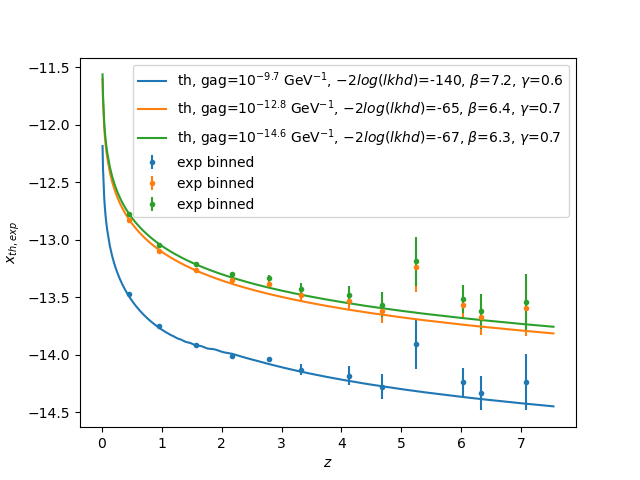

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [204]:
counter = 0
plt.subplots()

In [207]:
(OmL, 
h0, 
log10ma, 
log10ga,
M0, 
rs, 
qso_gamma, 
qso_beta, 
qso_delta) = pts[query(log10ma=-13., 
           log10ga=-15, #-10, -13, -15
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=idx_mins_global)]

#qso_gamma=0.7

x = (10**log10ma, 10**log10ga, OmL, h0, qso_gamma, qso_beta, qso_delta)
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

ch.use_loglkl = True

(chi2_ga, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print("\n\nbest fit point in the ma-ga block:\n \
OmL=%.2f, h0=%.2f, log10(ma)=%.2f, log10(ga)=%.2f, \
qso_gamma=%.2f, qso_beta=%.2f, qso_delta=%.2f\n"\
     %(OmL, h0, log10ma, log10ga, qso_gamma, qso_beta, qso_delta))
print("log(likelihood)=", chi2_ga)


#
# bin it
#
_, bins = np.histogram(qso_z_arr, bins=12)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))\
                          /len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])


#
# plot the exp vs theory
#
#plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', color='C'+str(counter), linewidth=1, alpha=0.6, markersize=4)
plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='C'+str(counter),zorder=10, label='exp binned')
x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, color='C'+str(counter), label=r"th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(lkhd)$=%.0f, $\beta$=%.1f, $\gamma$=%.1f" %(log10ga,chi2_ga, qso_beta, qso_gamma))

plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

#
# counter
#
counter += 1

17
8


best fit point in the ma-ga block:
 OmL=0.66, h0=0.73, log10(ma)=-12.92, log10(ga)=-14.63, qso_gamma=0.66, qso_beta=6.32, qso_delta=0.23

log(likelihood)= -66.54484353120628


### plot out residual

<IPython.core.display.Javascript object>


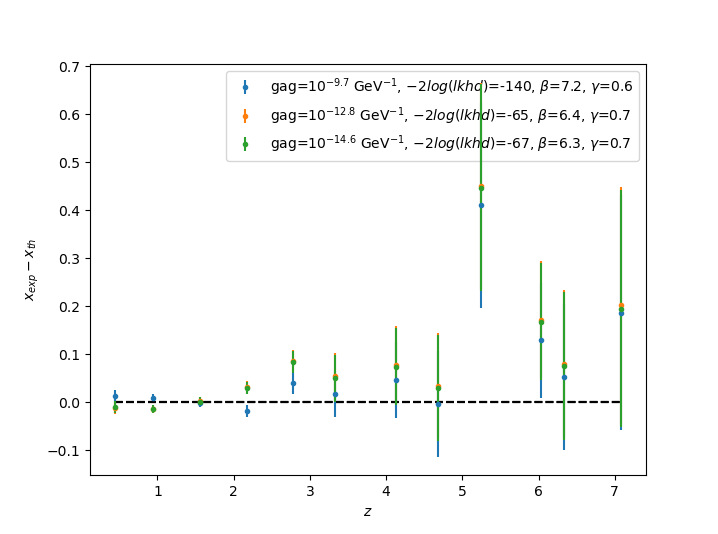

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [195]:
counter = 0
plt.subplots()

In [198]:
(OmL, 
h0, 
log10ma, 
log10ga,
M0, 
rs, 
qso_gamma, 
qso_beta, 
qso_delta) = pts[query(log10ma=-13., 
           log10ga=-15, #-10, -13, -15
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=idx_mins_global)]

x = (10**log10ma, 10**log10ga, OmL, h0, qso_gamma, qso_beta, qso_delta)
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

ch.use_loglkl = True

(chi2_ga, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print("\n\nbest fit point in the ma-ga block:\n \
OmL=%.2f, h0=%.2f, log10(ma)=%.2f, log10(ga)=%.2f, \
qso_gamma=%.2f, qso_beta=%.2f, qso_delta=%.2f\n"\
     %(OmL, h0, log10ma, log10ga, qso_gamma, qso_beta, qso_delta))
print("log(likelihood)=", chi2_ga)


#
# bin it
#
_, bins = np.histogram(qso_z_arr, bins=12)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))\
                          /len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])


#
# plot the exp vs theory
#
#plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', color='C'+str(counter), linewidth=1, alpha=0.6, markersize=4)
#plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='C'+str(counter),zorder=10, label='exp binned')
x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
#plt.plot(x, y, '-', zorder=10, color='C'+str(counter), label=r"th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(lkhd)$=%.0f, $\beta$=%.1f, $\gamma$=%.1f" %(log10ga,chi2_ga, qso_beta, qso_gamma))
y_bin = np.interp(z_bin_arr, x, y)
plt.errorbar(z_bin_arr, mu_exp_bin_arr-y_bin, sigma_bin_arr, fmt='.', color='C'+str(counter),zorder=10,
             label=r"gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(lkhd)$=%.0f, $\beta$=%.1f, $\gamma$=%.1f" %(log10ga,chi2_ga, qso_beta, qso_gamma))

plt.hlines(0., z_bin_arr[0], z_bin_arr[-1], linestyles='--', colors='k')
plt.ylabel('$x_{exp}-x_{th}$')
plt.xlabel('$z$')
plt.legend()

#
# counter
#
counter += 1

17
8


best fit point in the ma-ga block:
 OmL=0.66, h0=0.73, log10(ma)=-12.92, log10(ga)=-14.63, qso_gamma=0.66, qso_beta=6.32, qso_delta=0.23

log(likelihood)= -66.54484353120628


### vary only $g_{a\gamma}$

In [208]:
# load run027 first, then import query. See below
pts[query(log10ma=-13., 
           log10ga=-10, 
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=idx_mins_global)]

# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta, qso_delta

17
21


array([  0.69598685,   0.73231207, -12.87265296,  -9.68352357,
       -19.24262037, 141.08671135,   0.63832566,   7.23788775,
         0.2282186 ])

In [209]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.0, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.08)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 8)
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta, qso_delta)




ga = 10**-9.68352357
x = (10**-12.87265296, ga, 0.69598685, \
     0.73231207, 0.63832566,   7.23788775, 0.2282186)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}
                  
ch.use_loglkl = True

(chi2_ga, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga)

-140.20021513930521


In [210]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta, qso_delta)
ga_1 = 10**-11
x = (10**-12.87265296, ga_1, 0.69598685, \
     0.73231207, 0.63832566,   7.23788775, 0.2282186)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}
                  
ch.use_loglkl = True

(chi2_ga_1, 
 mu_th_1_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga_1)

92.41241601803301


In [211]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta, qso_delta)
ga_2 = 10**(-12.85954609)
x = (10**-12.87265296, ga_2, \
     0.69598685,  0.73231207, 0.63832566,   7.23788775, 0.2282186)
# x = (10**-12.85954609, ga_2,\
#      0.66330348,   0.72834954, 0.66183853,   6.38660085,   0.22979358)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}
                  
ch.use_loglkl = True

(chi2_ga_2, 
 mu_th_2_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga_2)

684.6340509655329


In [212]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta, qso_delta)
ga_4 = 10**-8.5
x = (10**-12.87265296, ga_4, 0.69598685, \
     0.73231207, 0.63832566,   7.23788775, 0.2282186)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}
                  
ch.use_loglkl = True

(chi2_ga_4, 
 mu_th_4_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga_4)

138.26045609682328


In [213]:
# bin data points
# bins = np.linspace(0, 7, 12)
_, bins = np.histogram(qso_z_arr, bins=12)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))\
                          /len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])

<IPython.core.display.Javascript object>


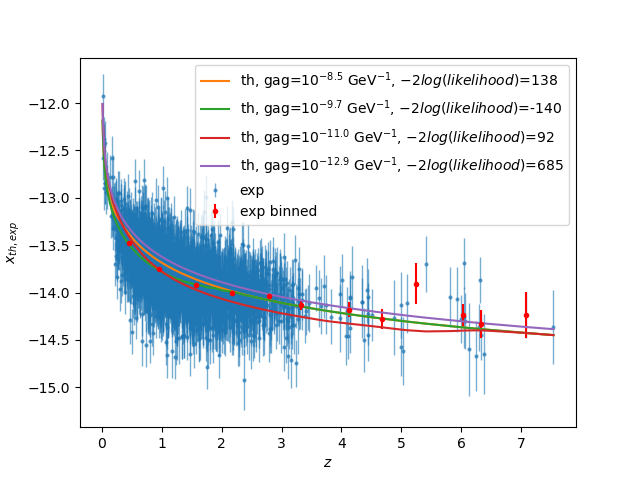

In [214]:
plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.6, markersize=4)

plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='red',zorder=10, label='exp binned')


x, y = zip(*sorted(zip(qso_z_arr, mu_th_4_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(likelihood)$=%.0f' %(np.log10(ga_4),chi2_ga_4))

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(likelihood)$=%.0f' %(np.log10(ga),chi2_ga))

x, y = zip(*sorted(zip(qso_z_arr, mu_th_1_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(likelihood)$=%.0f' %(np.log10(ga_1),chi2_ga_1))

x, y = zip(*sorted(zip(qso_z_arr, mu_th_2_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(likelihood)$=%.0f' %(np.log10(ga_2),chi2_ga_2))

# x, y = zip(*sorted(zip(qso_z_arr, mu_th_3_arr)))
# plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{%.1f}$ GeV$^{-1}$, $-2log(likelihood)$=%.0f' %(np.log10(ga_3),chi2_ga_3))


# x, y = zip(*sorted(zip(qso_z_arr, mu_th_ga12_arr)))
# plt.plot(x, y, '-', zorder=11, label='th, gag=10$^{-12}$ GeV$^{-1}$, $\chi^2$=%.0f' %chi2_ga12)

# x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
# plt.plot(x, y, '--', zorder=12, label='th, gag=10$^{-18}$ GeV$^{-1}$, $\chi^2$=%.0f' %chi2_ga18)
# #plt.xscale('log')
#plt.ylim(-13, -11)
#plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

In [112]:
# load run027 first, then import query. See below
pts[query(log10ma=-13., 
           log10ga=-14, 
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=idx_mins_global)]

# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta, qso_delta

17
10


array([  0.66330348,   0.72834954, -12.85954609, -13.88643803,
       -19.24703816, 136.57077046,   0.66183853,   6.38660085,
         0.22979358])

# Check UV-X relation

check the UV-X formula by hand
\begin{align}
\log_{10}(f_X) = \gamma \log_{10}(f_{UV}) + 2(\gamma - 1) \log_{10}(D_L) + \beta + (\gamma - 1) \log_{10}(4\pi)
\end{align}

In [75]:
# take one data point from Bisogni table 2
# z = 0.78
-31.12-(-28.21)*0.6

-14.194000000000003

In [78]:
# compute log(fX)-gamma log(fUV)
# w/ beta = 4 (c.f. Risaliti and Lusso at Nature, 1811.02590)
# w/ LCDM
# w/ DL in cm
2.*(0.6-1)*np.log10(5023*3.0857e+24) +4 + (0.6-1)*np.log10(4.*np.pi)

-17.99193744854401

In [77]:
5023*3.0857e+24

1.54994711e+28

In [45]:
from classy import Class
import classy
print(classy.__file__)

params = {
    #'gauge':'synchronous',
    'gauge':'newtonian',
    'input_verbose' : 1,
    'background_verbose' : 2,
    'thermodynamics_verbose': 1,
    'perturbations_verbose': 2,
    'h': 0.7, #0.673,
    'omega_b': 0.02205,
    'Omega_cdm': (0.3 - 0.02205/0.7**2),
    #'omega_cdm': 0.1199,
    #'omega_cdm': 0.01,
    'tau_reio': 0.089,
    'A_s':np.exp(3.089)*10**-10,
    'n_s':0.9603,
    'N_ur' : 2.03351,
    'N_ncdm' : 1,
    'm_ncdm' : 0.06,
    'T_ncdm' : 0.715985, 
    'T_cmb' : 2.2755
}


try:
    cosmo.struct_cleanup()
except:
    pass
# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)
cosmo.compute()

print(cosmo.age())

/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/classy.cpython-38-x86_64-linux-gnu.so
13.45511764177868


In [124]:
# manually load up the data to check
def log10FX(log10FUV, gamma, beta, z):
    """ w/o axions
    """
    DL_in_cm = cosmo.luminosity_distance(z)*3.0857e+24
    res = gamma*log10FUV + beta + (gamma-1)*np.log10(4.*np.pi) + 2.*(gamma-1)*np.log10(DL_in_cm)
    return res


In [125]:
qso_f2500_arr
qso_f2keV_arr

array([-31.1167, -32.0376, -31.1971, ..., -31.9086, -31.3855, -31.4902])

In [126]:
log10FX_th_arr = []
for i,_ in enumerate(qso_z_arr):
    log10FUV = qso_f2500_arr[i]
    z = qso_z_arr[i]
    log10FX_th_arr.append(log10FX(log10FUV, 
                               gamma=0.71, 
                               beta=5., 
                               z=z))

<IPython.core.display.Javascript object>


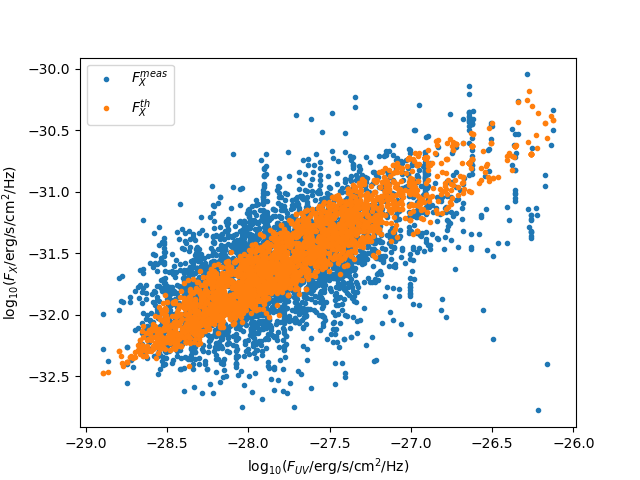

Text(0, 0.5, '$\\log_{10}(F_{X}/\\mathrm{erg/s/cm^2/Hz})$')

In [127]:
plt.subplots()
plt.plot(qso_f2500_arr, qso_f2keV_arr, '.', label=r'$F_{X}^{meas}$')
#plt.plot(qso_f2500_arr, fun_linear(qso_f2500_arr, gamma=0.65, beta=-13.5))
plt.plot(qso_f2500_arr, log10FX_th_arr, '.', label=r'$F_{X}^{th}$')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'$\log_{10}(F_{UV}/\mathrm{erg/s/cm^2/Hz})$')
plt.ylabel(r'$\log_{10}(F_{X}/\mathrm{erg/s/cm^2/Hz})$')

In [71]:
cosmo.luminosity_distance(1)

6604.407462675764

<IPython.core.display.Javascript object>


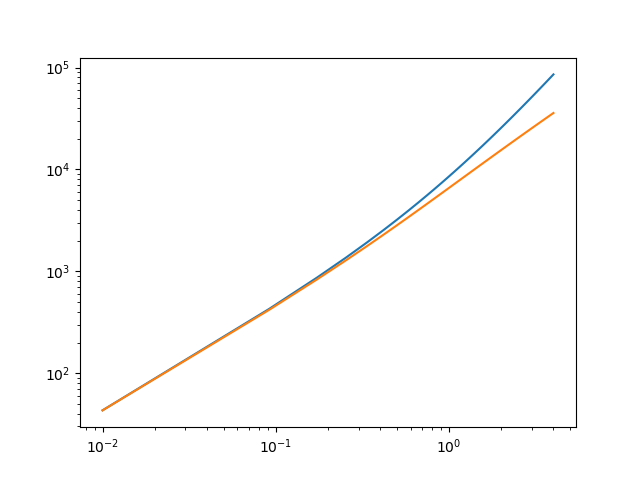

In [74]:
z_arr = np.linspace(0.01, 4)
DL_proxy_arr = (1+z_arr)*z_arr*4282.7494
DL_arr = [cosmo.luminosity_distance(z) for z in z_arr]
plt.subplots()
plt.plot(z_arr, DL_proxy_arr)
plt.plot(z_arr, DL_arr)
plt.xscale('log')
plt.yscale('log')

# Optimization

In [5]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

In [6]:
%%time
# for loop
ch.chi2_quasars(x, data=data, vectorize=False, **quasars_kwargs)
# CPU times: user 1.33 s, sys: 26.2 ms, total: 1.36 s
# Wall time: 1.36 s
# 122531.70409303115

CPU times: user 1.33 s, sys: 26.2 ms, total: 1.36 s
Wall time: 1.36 s


122531.70409303115

In [7]:
%%time
# numpy vectorized
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)

#CPU times: user 1.24 s, sys: 18.3 ms, total: 1.26 s
#Wall time: 1.26 s
#122531.70409303124


CPU times: user 1.24 s, sys: 18.3 ms, total: 1.26 s
Wall time: 1.26 s


122531.70409303124

In [8]:
# quasars_kwargs['prob_func'] = 'small_P'
# quasars_kwargs['Nz'] = 500
quasars_kwargs['method'] = 'quad'

In [9]:
%%time
# tweak method, Nz, prob_func
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)

CPU times: user 2.31 s, sys: 136 ms, total: 2.45 s
Wall time: 2.36 s


122531.70409282293

In [10]:
from igm import igm_Psurv
(ma,
  g,
  z,
  s,
  B,
  omega,
  mg,
  h,
  OmL,
  axion_ini_frac,
  smoothed,
  redshift_dependent,
  method,
  prob_func,
  Nz)= (1.2589254117941662e-16, 
        1e-11, 
        0.76489, 
        1.0, 
        1.0, 
        2000.0, 
        4.69758169168822e-15, 
        0.66, 
        0.6, 
        0.0, 
        False, 
        True, 
        'simps', 
        'norm_log', 
        101)

In [56]:
%%timeit
for j in range(2):
    for i in range(len(qso_z_arr)):
        igm_Psurv(ma=ma, 
                  g=g, 
                  z=z,
                  s=s,
                  B=B,
                  omega=omega,
                  mg=mg,
                  h=h,
                  Omega_L=OmL,
                  axion_ini_frac=axion_ini_frac,
                  smoothed=smoothed,
                  redshift_dependent=redshift_dependent,
                  method=method,
                  prob_func=prob_func,
                  Nz=Nz)

1 loop, best of 3: 1.85 s per loop


In [55]:
%%timeit
for j in range(2):
    igm_Psurv(ma=ma, 
          g=g, 
          z=qso_z_arr,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='vectorize',
          prob_func=prob_func,
          Nz=Nz)

10 loops, best of 3: 11.6 ms per loop


In [57]:
# improvement
1850/11.6

159.48275862068965

In [12]:
# fraction of time of chi2_quasars() spent on igm_Psurv()
1.09/1.26

0.8650793650793651

In [35]:
from tools import my_ceil
print(my_ceil(1e-8, 4))
print(my_ceil(300987, 4))
print(my_ceil([300987,1e-2, 1e-10], 4))

0.0001
300987.0
[3.00987e+05 1.00000e-02 1.00000e-04]


In [61]:
res_vec_arr = igm_Psurv(ma=ma, 
          g=g, 
          z=qso_z_arr,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='vectorize',
          prob_func=prob_func,
          Nz=Nz)


In [63]:
res_simp_arr = []
for z in qso_z_arr:
    res_simp_arr.append(igm_Psurv(ma=ma, 
          g=g, 
          z=z,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='simps',
          prob_func=prob_func,
          Nz=Nz))

<IPython.core.display.Javascript object>


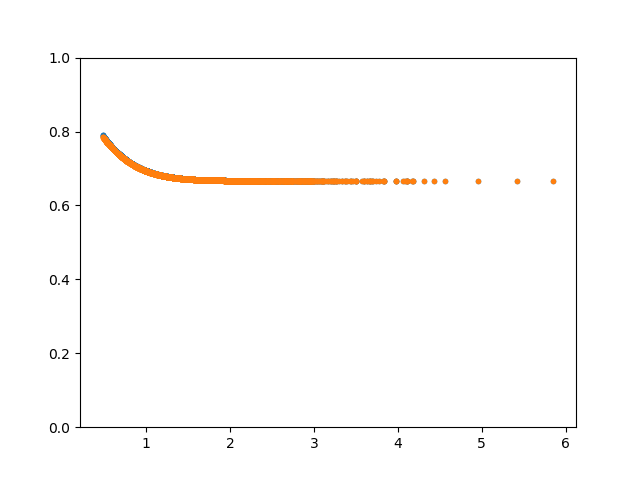

(0, 1)

In [69]:
plt.subplots()
plt.plot(qso_z_arr, res_simp_arr,'.') 
plt.plot(qso_z_arr, res_vec_arr, '.')
#plt.yscale('log')
plt.ylim(0, 1)

<IPython.core.display.Javascript object>


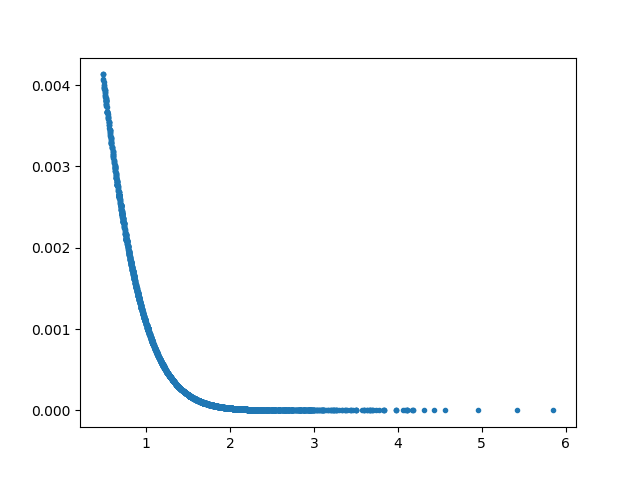

In [71]:
# residual of the two methods
plt.subplots()
plt.plot(qso_z_arr, (res_simp_arr-res_vec_arr)/res_vec_arr,'.') 
#plt.plot(qso_z_arr, res_vec_arr, '.')
#plt.yscale('log')


In [ ]:
# now with true vectorization


In [72]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

In [76]:
%%timeit
# for loop
ch.chi2_quasars(x, data=data, vectorize=False, **quasars_kwargs)
# 1 loop, best of 3: 2.55 s per loop

1 loop, best of 3: 2.55 s per loop


In [77]:
%%timeit
# true vectorized
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)
# 10 loops, best of 3: 131 ms per loop


10 loops, best of 3: 131 ms per loop


In [78]:
# improvement
2.55/0.131

19.46564885496183

# Luminosity distance expansion

In [23]:
def DL_poly(z, h0=0.7, OmL=0.7): #Mpc
    OmM = 1.-OmL
    a2 = 1- 0.75*OmM
    a3 = 1./8*OmM*(-10.+9.*OmM)
    a4 = -5./64*OmM*(8.-36.*OmM+27.*OmM**2)
    #x = np.log10(1+z)
    #res = np.log(10)*2997.92458/h0*(x + a2*x**2 + a3*x**3)
    x = z
    res = 2997.92458/h0*(x + a2*x**2 + a3*x**3 + a4*x**4)
    return res

def DL_log(z, h0=0.7, OmL=0.7): #Mpc
    OmM = 1.-OmL
    a2 = 1.5 - 0.75 * OmM
    a3 = 7./6. - 2.*OmM + 9./8 * OmM**2
    #x = np.log10(1+z)
    #res = np.log(10)*2997.92458/h0*(x + a2*x**2 + a3*x**3)
    x = np.log(1+z)
    res = 2997.92458/h0*(x + a2*x**2 + a3*x**3)
    return res

def DL(z, h0=0.7, OmL=0.7):
    res = [(1+zi)*co.tau_at_z(zi, h0, OmL) for zi in z]
    return np.array(res)

In [108]:
DL_poly(np.array([0., 1.]))

array([   0.       , 6466.6170042])

In [109]:
DL_log(np.array([0., 1.]))

array([   0.        , 6544.71556818])

In [110]:
DL([0., 1])

array([   0.        , 6607.65761177])

<IPython.core.display.Javascript object>


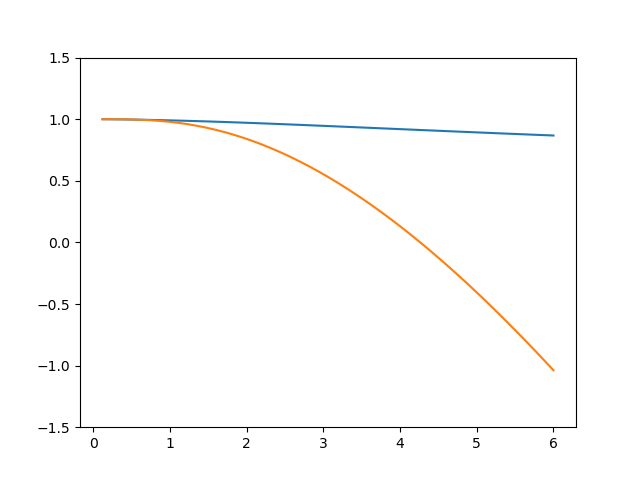

<ipython-input-112-a21db37f2a59>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr, DL_log(z_arr)/DL(z_arr))
<ipython-input-112-a21db37f2a59>:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr, DL_poly(z_arr)/DL(z_arr))


(-1.5, 1.5)

In [112]:
plt.subplots()
z_arr = np.linspace(0, 6)
#plt.plot(z_arr, DL_log(z_arr))
#plt.plot(z_arr, DL(z_arr))
plt.plot(z_arr, DL_log(z_arr)/DL(z_arr))
plt.plot(z_arr, DL_poly(z_arr)/DL(z_arr))
plt.ylim(-1.5, 1.5)

# Check data

### distance modulus

In [ ]:
# (qso_name_arr,
#  qso_z_arr,
#  qso_f2500_arr,
#  qso_df2500_arr,
#  qso_f2keV_arr,
#  qso_df2keV_low_arr,
#  qso_df2keV_up_arr) = data

In [24]:
_Mpc_over_cm_ = 3.0857e+24
L_UV_arr = 10**qso_f2500_arr * 4.*np.pi*(DL(qso_z_arr)*_Mpc_over_cm_)**2
L_X_arr = 10**qso_f2keV_arr * 4.*np.pi*(DL(qso_z_arr)*_Mpc_over_cm_)**2
dlogL_X_arr = ((qso_df2keV_up_arr+qso_df2keV_low_arr)/2.) 

L_UV_raw_arr = 10**qso_f2500_raw_arr * 4.*np.pi*(DL(qso_z_raw_arr)*_Mpc_over_cm_)**2
L_X_raw_arr = 10**qso_f2keV_raw_arr * 4.*np.pi*(DL(qso_z_raw_arr)*_Mpc_over_cm_)**2
dlogL_X_raw_arr = ((qso_df2keV_up_raw_arr+qso_df2keV_low_raw_arr)/2.) 

<IPython.core.display.Javascript object>


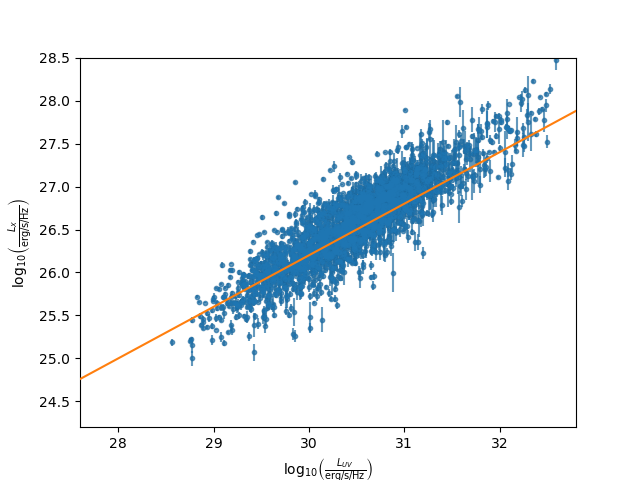

Text(0, 0.5, '$\\log_{10} \\left ( \\frac{L_{X}}{\\rm erg/s/Hz} \\right)$')

In [27]:
plt.subplots()
# plt.plot(np.log10(L_UV_arr), np.log10(L_X_arr), '.')

plt.errorbar(np.log10(L_UV_raw_arr), np.log10(L_X_raw_arr), dlogL_X_raw_arr, fmt='.', alpha=0.2, color='k')
plt.errorbar(np.log10(L_UV_arr), np.log10(L_X_arr), dlogL_X_arr, fmt='.', alpha=0.6)

x_arr = np.linspace(27, 33)
y_arr = 0.6*x_arr + 8.2  # ?? why 7.3
plt.plot(x_arr, y_arr, zorder=10)
plt.ylim(24.2, 28.5)
plt.xlim(27.6, 32.8)
plt.xlabel(r'$\log_{10} \left ( \frac{L_{UV}}{\rm erg/s/Hz} \right)$')
plt.ylabel(r'$\log_{10} \left ( \frac{L_{X}}{\rm erg/s/Hz} \right)$')

### distance modulus

In [366]:
dist_modulus_th([2,3], h0=0.7, OmL=0.7, w=1)

array([43.98816507, 44.73765267])

In [363]:
dist_modulus_th([2,3], h0=0.7, OmL=0.7, w=-1)

array([45.95719725, 47.02611193])

In [415]:
def dist_modulus_th_a2a3(z, h0, a2, a3):
    #DL_in_Mpc = np.array([(1+zi)*co.tau_at_z(zi, h0, OmL, w) for zi in z])
    DL_in_Mpc = np.array([co.dL_at_z_a2a3(zi, h0, a2, a3) for zi in z])
    DL_in_10pc = DL_in_Mpc * 10**5 # convert to [10pc]
    res = np.log10(DL_in_10pc) * 5.
    return res
    
    
def dist_modulus_th(z, h0=0.7, OmL=0.7, w=-1):
    DL_in_Mpc = np.array([(1+zi)*co.tau_at_z(zi, h0, OmL, w) for zi in z])
    DL_in_10pc = DL_in_Mpc * 10**5 # convert to [10pc]
    res = np.log10(DL_in_10pc) * 5.
    return res
    

def dist_modulus_exp(gamma, beta, data, delta=0.):
    """Compute the dist modulus using the quantities from Lusso dataset. 
    """
    (qso_name_arr,
     qso_z_arr,
     qso_f2500_arr,
     qso_df2500_arr,
     qso_f2keV_arr,
     qso_df2keV_low_arr,
     qso_df2keV_up_arr, _) = data
    
    log10_DL_cm = (qso_f2keV_arr - gamma * qso_f2500_arr  - (gamma-1)*np.log10(4.*np.pi) - beta)/2./(gamma-1)
    _10_pc_over_cm_ = 3.0857e+19
    log10_DL_10pc = log10_DL_cm - np.log10(_10_pc_over_cm_)
    
    # error
    sigma = 5/(2.*np.abs(gamma-1))*np.sqrt((gamma*qso_df2500_arr)**2 
                                           + (qso_df2keV_low_arr+qso_df2keV_up_arr)**2/4 +delta**2)
    return (5*log10_DL_10pc, sigma)

def dist_modulus_expread(gamma, beta, delta=0.):
    """Directly read the distance modulus from Lusso dataset.
    """
    data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100, 
                       get_dm=True)
    (qso_name_arr,
     qso_z_arr,
     qso_f2500_arr,
     qso_df2500_arr,
     qso_f2keV_arr,
     qso_df2keV_low_arr,
     qso_df2keV_up_arr, 
     _, 
     qso_dist_mod_arr,
     qso_ddist_mod_arr) = data
    
    return (qso_dist_mod_arr, np.sqrt(qso_ddist_mod_arr**2+delta**2))



In [221]:
# exp
(_ ,qso_z_arr ,_ ,_ ,_ ,_ ,_ , _) = data
mu_exp_arr, sigma_arr = dist_modulus_exp(0.65, 6.8, data)

# exp directly read the distance modulus from Lusso data set
mu_expread_arr, sigma_expread_arr = dist_modulus_expread(0.65, 6.8)

# bin data points
# bins = np.linspace(0, 7, 12)
_, bins = np.histogram(qso_z_arr, bins=12)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.mean((sigma_arr**2)[digi==i])) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])

# theory
OmL = 0.6
h0 = 0.7
z_arr = np.linspace(0, 7.5, 3000)
mu_th_arr = dist_modulus_th(z_arr, h0=h0, OmL=OmL)

# chi2 using binned data
sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=0.7) - mu_exp_bin_arr)**2/sigma_bin_arr**2)

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


<ipython-input-218-a78ee87dc8f8>:4: RuntimeWarning: divide by zero encountered in log10
  res = np.log10(DL_in_10pc) * 5.


15.565144378887712

<IPython.core.display.Javascript object>


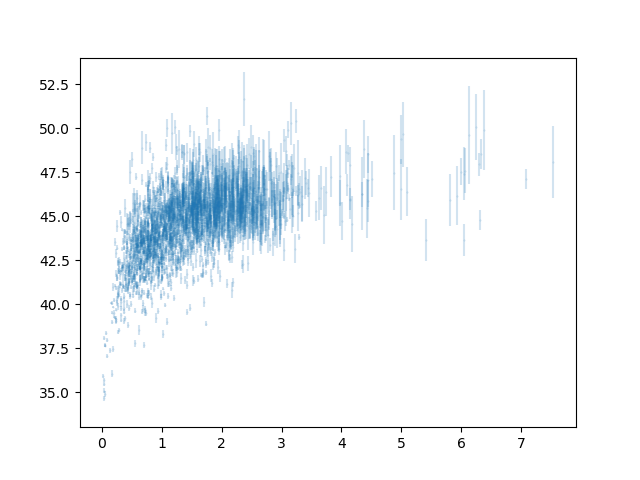

(33.0, 54.0)

In [223]:
plt.subplots()

# plot dist mod directly from data
plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

#plt.xlim(-0.1, 6)
plt.ylim(33, 54)



<IPython.core.display.Javascript object>


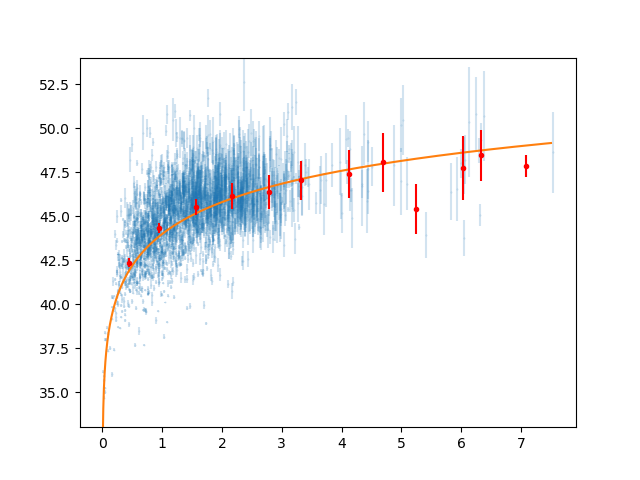

(33.0, 54.0)

In [224]:
plt.subplots()

# full data
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', alpha=0.2, markersize=0.7)

# # plot dist mod directly from data
# plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

# binned
plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='red',zorder=10)

# theory
plt.plot(z_arr, mu_th_arr, zorder=3)
#plt.xlim(-0.1, 6)
plt.ylim(33, 54)





# # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.65, 6.8)

# # quasar kwargs
# quasars_kwargs = {'B': 1., # [nG]
#                   'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
#                   's': 1., # [Mpc]
#                   'omega_X': 2000.,  
#                   'omega_UV': 4.96, 
#                   'axion_ini_frac': 0.,
#                   'smoothed': False,
#                   'redshift_dependent': True,
#                   'method': 'simps',
#                   'prob_func': 'norm_log',
#                   'Nz': 101}

# (chi2_ga18, 
#  _, 
#  _, 
#  _,
#  _) = ch.chi2_quasars(x,
#                               data=data,
#                               vectorize=True,
#                               full_output=True,
#                               **quasars_kwargs)
# print(chi2_ga18)

In [87]:
# read dist mod
data_distmod = dt.load_quasars("./likelihoods", 
                   "quasars_Lusso2020.txt",
                   z_low=0.,
                   z_up=10.,
                   Gamma_low=1.2,
                   Gamma_up=100, 
                   get_dm=True)

# full data set
OmL_arr = np.linspace(0.1, 0.9, 25)
# OmL_arr = [0.65]
chi2_arr = []

for OmL in OmL_arr:
    
    # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
    x = (10**-15.9, 1e-18, OmL, 0.66, 0.65, 6.8)

    # quasar kwargs
    quasars_kwargs = {'B': 1., # [nG]
                      'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                      's': 1., # [Mpc]
                      'omega_X': 2000.,  
                      'omega_UV': 4.96, 
                      'axion_ini_frac': 0.,
                      'smoothed': False,
                      'redshift_dependent': True,
                      'method': 'simps',
                      'prob_func': 'norm_log',
                      'Nz': 101}

#     (chi2, 
#      _, 
#      _, 
#      _,
#      _) = ch.chi2_quasars_dist_mod(x,
#                                   data=data_distmod,
#                                   vectorize=True,
#                                   full_output=True,
#                                   **quasars_kwargs)
    (chi2,
     mu_th_arr,
     mu_exp_arr,
     sigma_arr, 
     qso_z_arr) = ch.chi2_quasars_dist_mod(x,
                                  data=data_distmod,
                                  vectorize=True,
                                  full_output=True,
                                  **quasars_kwargs)
#     chi2 = ch.chi2_quasars(x,
#                                   data=data,
#                                   vectorize=False,
#                                   full_output=True,
#                                   **quasars_kwargs)
    chi2_arr.append(chi2)
chi2_arr = np.array(chi2_arr)

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [250]:
# plt.subplots()
# plt.plot(qso_z_arr, mu_th_arr, '.', zorder=10)
# plt.plot(qso_z_arr, mu_exp_arr, '.')


<IPython.core.display.Javascript object>


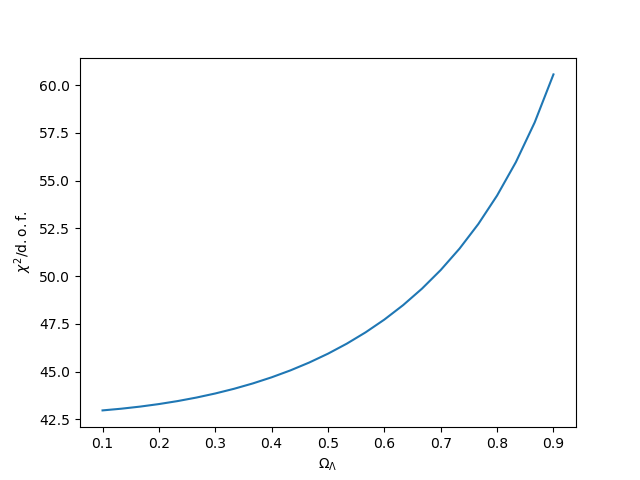

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [88]:
plt.subplots()
plt.plot(OmL_arr, chi2_arr/len(qso_z_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

In [97]:
# plot chi2 with full data set and chi2 with reduced data set

# full data set
OmL_arr = np.linspace(0.1, 0.9, 25)
chi2_arr = []

for OmL in OmL_arr:
    
    # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
    x = (10**-15.9, 1e-18, OmL, 0.66, 0.65, 6.8)

    # quasar kwargs
    quasars_kwargs = {'B': 1., # [nG]
                      'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                      's': 1., # [Mpc]
                      'omega_X': 2000.,  
                      'omega_UV': 4.96, 
                      'quasar_delta': 0.15, # 0.
                      'axion_ini_frac': 0.,
                      'smoothed': False,
                      'redshift_dependent': True,
                      'method': 'simps',
                      'prob_func': 'norm_log',
                      'Nz': 101}

    (chi2, 
     _, 
     _, 
     _,
     _) = ch.chi2_quasars(x,
                                  data=data,
                                  vectorize=True,
                                  full_output=True,
                                  **quasars_kwargs)
#     chi2 = ch.chi2_quasars(x,
#                                   data=data,
#                                   vectorize=False,
#                                   full_output=True,
#                                   **quasars_kwargs)
    chi2_arr.append(chi2)
chi2_arr = np.array(chi2_arr)

<IPython.core.display.Javascript object>


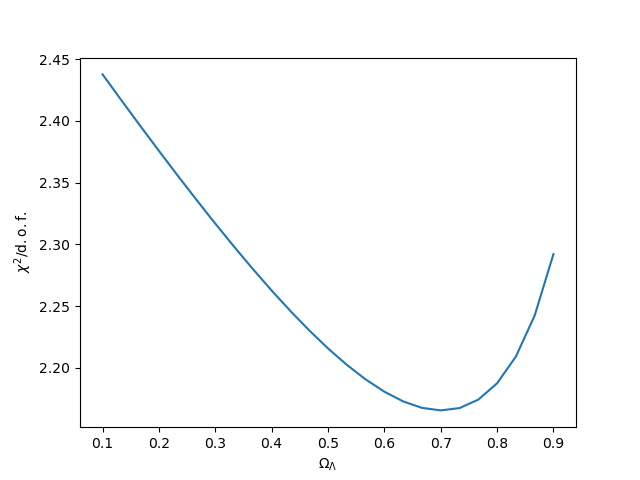

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [98]:
plt.subplots()
plt.plot(OmL_arr, chi2_arr/len(qso_z_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

In [176]:
# theory
# OmL = 0.6
chi2_bin_arr = []
for OmL in OmL_arr:
    h0 = 0.7
    #z_arr = np.linspace(0, 7.5, 3000)
    #mu_th_arr = dist_modulus_th(z_arr, h0=h0, OmL=OmL)

    # chi2 using binned data
    chi2_bin_arr.append(sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=OmL) - mu_exp_bin_arr)**2/sigma_bin_arr**2))
    
chi2_bin_arr = np.array(chi2_bin_arr)    

<IPython.core.display.Javascript object>


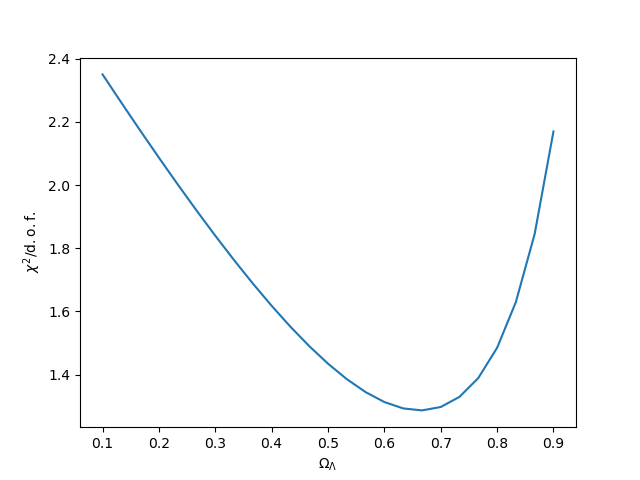

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [177]:
plt.subplots()
plt.plot(OmL_arr, chi2_bin_arr/len(z_bin_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

# parse the chains

In [28]:
from bin_chi2 import parse, query
from copy import copy

In [293]:
(bf_chi2, 
 ma_mesh,
 ga_mesh,
 chi2_mesh,
 idx_mins_global,
 ma_arr,
 ga_arr,
 delta_arr, 
 idx_mins_global, 
 pts) = parse(directory="./chains/run027_bak",
                    chain_name="chain_1.h5",
                    bins=25)

<KeysViewHDF5 ['accepted', 'blobs', 'chain', 'log_prob']>
pts shape is: (40000, 100, 9)
chi2_tot shape is: (40000, 100)
edges_ga: [-13.99943489 -13.76868742 -13.53793995 -13.30719249 -13.07644502
 -12.84569755 -12.61495008 -12.38420261 -12.15345514 -11.92270767
 -11.69196021 -11.46121274 -11.23046527 -10.9997178  -10.76897033
 -10.53822286 -10.30747539 -10.07672793  -9.84598046  -9.61523299
  -9.38448552  -9.15373805  -8.92299058  -8.69224311  -8.46149565
  -8.23074818  -8.00000071]
chain_ga has the length of 4000000
chain_neg_ga has the length of 3901100
edges_ma: [-16.99970121 -16.76275168 -16.52580215 -16.28885262 -16.05190309
 -15.81495356 -15.57800403 -15.3410545  -15.10410497 -14.86715544
 -14.63020591 -14.39325638 -14.15630685 -13.91935732 -13.68240778
 -13.44545825 -13.20850872 -12.97155919 -12.73460966 -12.49766013
 -12.2607106  -12.02376107 -11.78681154 -11.54986201 -11.31291248
 -11.07596295]
chain_ma has the length of 4000000
chain_neg_ma has the length of 3901100
len(tmp1_

100%|██████████| 25/25 [01:34<00:00,  3.80s/it]


In [245]:
(bf_chi2, 
 ma_mesh,
 ga_mesh,
 chi2_mesh,
 idx_mins_global,
 ma_arr,
 ga_arr,
 delta_arr, 
 idx_mins_global,
 pts) = parse(directory="./chains/run028_td_pan_sh0es_boss_cluster_noicm",
                    chain_name="chain_1.h5",
                    bins=25)

<KeysViewHDF5 ['accepted', 'blobs', 'chain', 'log_prob']>
pts shape is: (40000, 100, 6)
chi2_tot shape is: (40000, 100)
experiments: dict_keys(['shoes', 'pantheon', 'boss', 'bao', 'tdcosmo', 'clusters'])
bf_m2loglkl: -632.3345365823255 bf_idx: 1159573
Each m2loglkl: [-16.16992586700944, -1178.5997625991572, -3.813235547605848, 37.62826810856993, -7.147638630505548, 535.7677579533826]
m2loglkl best fit: -632.3345365823255 = -632.3345365823255


100%|██████████| 25/25 [01:13<00:00,  2.95s/it]


In [29]:
(bf_chi2, 
 ma_mesh,
 ga_mesh,
 chi2_mesh,
 idx_mins_global,
 ma_arr,
 ga_arr,
 delta_arr, 
 idx_mins_global,
 pts) = parse(directory="./chains/run027_loglkl_amp_fix_bigrange",
                    chain_name="chain_1.h5",
                    bins=25)

<KeysViewHDF5 ['accepted', 'blobs', 'chain', 'log_prob']>
pts shape is: (40000, 100, 9)
chi2_tot shape is: (40000, 100)
edges_ga: [-17.99999369 -17.61538078 -17.23076787 -16.84615496 -16.46154205
 -16.07692914 -15.69231623 -15.30770332 -14.92309041 -14.5384775
 -14.15386459 -13.76925168 -13.38463877 -13.00002586 -12.61541295
 -12.23080004 -11.84618713 -11.46157422 -11.07696131 -10.6923484
 -10.30773549  -9.92312258  -9.53850967  -9.15389676  -8.76928385
  -8.38467094  -8.00005803]
chain_ga has the length of 4000000
chain_neg_ga has the length of 4000000
edges_ma: [-16.99997811 -16.7599791  -16.51998008 -16.27998107 -16.03998206
 -15.79998305 -15.55998404 -15.31998503 -15.07998602 -14.83998701
 -14.59998799 -14.35998898 -14.11998997 -13.87999096 -13.63999195
 -13.39999294 -13.15999393 -12.91999491 -12.6799959  -12.43999689
 -12.19999788 -11.95999887 -11.71999986 -11.48000085 -11.24000184
 -11.00000282]
chain_ma has the length of 4000000
chain_neg_ma has the length of 4000000
len(tmp1_ar

100%|██████████| 25/25 [01:37<00:00,  3.90s/it]


In [202]:
print(ma_mesh.shape)
print(ga_mesh.shape)
print(chi2_mesh.shape)

(25, 26)
(25, 26)
(25, 26)


In [203]:
ma_mesh[:,0]

array([-16.8799786 , -16.63997959, -16.39998058, -16.15998157,
       -15.91998256, -15.67998354, -15.43998453, -15.19998552,
       -14.95998651, -14.7199875 , -14.47998849, -14.23998948,
       -13.99999047, -13.75999145, -13.51999244, -13.27999343,
       -13.03999442, -12.79999541, -12.5599964 , -12.31999739,
       -12.07999838, -11.83999936, -11.60000035, -11.36000134,
       -11.12000233])

In [204]:
ga_mesh[0]

array([-17.80768724, -17.42307433, -17.03846142, -16.65384851,
       -16.2692356 , -15.88462269, -15.50000978, -15.11539687,
       -14.73078396, -14.34617105, -13.96155814, -13.57694523,
       -13.19233232, -12.8077194 , -12.42310649, -12.03849358,
       -11.65388067, -11.26926776, -10.88465485, -10.50004194,
       -10.11542903,  -9.73081612,  -9.34620321,  -8.9615903 ,
        -8.57697739,  -8.19236448])

In [258]:
chi2_mesh

array([[-1230.90648765, -1230.11318092, -1229.76934315, -1225.94242292,
        -1172.46873408, -1113.90794193,  -605.12196705, -1180.07699746,
        -1181.63535807, -1181.26378554, -1189.35338006, -1181.40205197,
                   inf,            inf,            inf,            inf,
                   inf,            inf,            inf,            inf,
                   inf,            inf,            inf,            inf,
                   inf,            inf],
       [-1231.1948906 , -1230.83379014, -1229.57797716, -1226.14616863,
        -1183.06827018, -1109.147013  ,    11.96696885, -1182.37554221,
        -1182.02430476, -1185.41980152, -1187.80618038, -1182.10114325,
                   inf,            inf,            inf,            inf,
                   inf,            inf,            inf,            inf,
                   inf,            inf,            inf,            inf,
                   inf,            inf],
       [-1229.69412682, -1229.84502375, -1228.84921447

In [268]:
ga_mesh

array([[-17.80768724, -17.42307433, -17.03846142, -16.65384851,
        -16.2692356 , -15.88462269, -15.50000978, -15.11539687,
        -14.73078396, -14.34617105, -13.96155814, -13.57694523,
        -13.19233232, -12.8077194 , -12.42310649, -12.03849358,
        -11.65388067, -11.26926776, -10.88465485, -10.50004194,
        -10.11542903,  -9.73081612,  -9.34620321,  -8.9615903 ,
         -8.57697739,  -8.19236448],
       [-17.80768724, -17.42307433, -17.03846142, -16.65384851,
        -16.2692356 , -15.88462269, -15.50000978, -15.11539687,
        -14.73078396, -14.34617105, -13.96155814, -13.57694523,
        -13.19233232, -12.8077194 , -12.42310649, -12.03849358,
        -11.65388067, -11.26926776, -10.88465485, -10.50004194,
        -10.11542903,  -9.73081612,  -9.34620321,  -8.9615903 ,
         -8.57697739,  -8.19236448],
       [-17.80768724, -17.42307433, -17.03846142, -16.65384851,
        -16.2692356 , -15.88462269, -15.50000978, -15.11539687,
        -14.73078396, -14.3461

In [275]:
ma_mesh

array([[-16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719, -16.65970719, -16.65970719,
        -16.65970719, -16.65970719],
       [-15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914, -15.97971914, -15.97971914,
        -15.97971914, -15.97971914],
       [-15.29973109, -15.29973109, -15.29973109, -15.29973109,
        -15.29973109, -15.29973109, -15.29973109, -15.29973109,
        -15.29973109, -15.2997

In [281]:
chi2inf_flat = copy(chi2_mesh).reshape(-1)
for i,x in enumerate(chi2inf_flat):
    if np.isinf(x):
        chi2inf_flat[i] = 1
    else:
        chi2inf_flat[i] = 0

In [215]:
# Cval = [[0,0,1], [0,0,1], [0,1,0]]
# a_arr = np.arange(3)
# b_arr = np.arange(3)
# tmpa_mesh, tmpb_mesh = np.meshgrid(a_arr, b_arr, indexing='ij')

# plt.subplots()
# plt.pcolormesh(tmpa_mesh, tmpb_mesh, Cval, shading='auto', cmap=plt.cm.BuGn_r)

In [142]:
# plt.subplots()
# plt.hist2d(ma_mesh, ga_mesh, weights=chi2inf_flat.reshape(ma_mesh.shape))

<IPython.core.display.Javascript object>


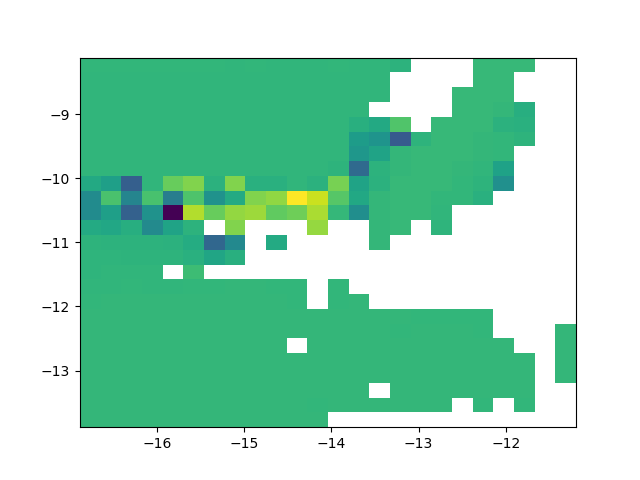

<ipython-input-285-7c2ef570959d>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ma_mesh, ga_mesh, np.log(np.abs(chi2_mesh)))  #, cmap=plt.cm.BuGn_r)


In [285]:
plt.subplots()
plt.pcolormesh(ma_mesh, ga_mesh, np.log(np.abs(chi2_mesh)))  #, cmap=plt.cm.BuGn_r)
#plt.pcolormesh(ma_mesh, ga_mesh, chi2inf_flat.reshape(ma_mesh.shape))# shading='auto', cmap=plt.cm.BuGn_r)

In [300]:
query(log10ma=-13, 
           log10ga=-16, 
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=chi2_mesh)

17
0


inf

In [302]:
query(log10ma=-13, 
           log10ga=-10, 
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=chi2_mesh)

17
17


-1312.6355091679798

### extract single point

In [30]:

query(log10ma=-13, 
           log10ga=-10, 
           ma_mesh=ma_mesh, 
           ga_mesh=ga_mesh, 
           target_mesh=idx_mins_global)

17
21


3242397

In [31]:
# OmL, h0, logma, logga, M0, rs, qso_gamma, qso_beta, qso_delta
pts[3242397]

#0.69598685,   0.73231207, -12.87265296,  -9.68352357,
#       -19.24262037, 141.08671135,   0.63832566,   7.23788775,
#         0.2282186

array([  0.69598685,   0.73231207, -12.87265296,  -9.68352357,
       -19.24262037, 141.08671135,   0.63832566,   7.23788775,
         0.2282186 ])

In [ ]:
# TODO: plot out the point and compare w/ quasar data

# test the 2 param $D_L$

Let us test if the photon-axion conversion goes in the same direction as small $a_3$ large $a_2$.

<IPython.core.display.Javascript object>


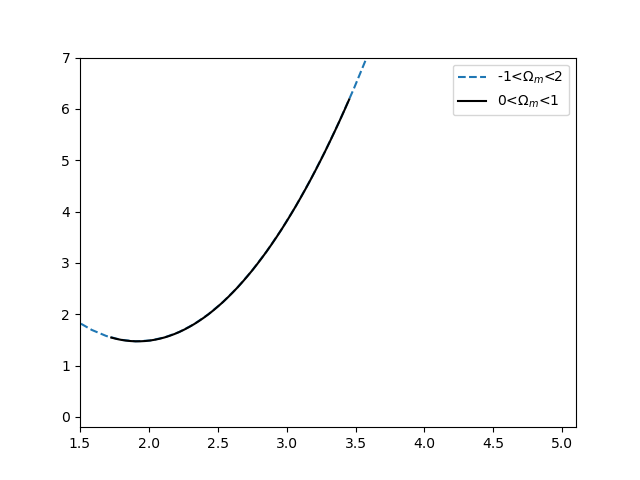

(1.5, 5.1)

In [220]:
def a2_fn(Omm):
    return -3./4*(Omm - 2.)*np.log(10)
def a3_fn(Omm):
    return (7./6 - 2.*Omm + 9./8*Omm**2)*np.log(10)**2


plt.subplots()
Omm_arr = np.linspace(-1., 2.)
plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), '--', label='-1<$\Omega_m$<2')
Omm_arr = np.linspace(0., 1.)
plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), 'k', label='0<$\Omega_m$<1')

plt.legend()
plt.ylim(-0.2, 7)
plt.xlim(1.5, 5.1)

<IPython.core.display.Javascript object>


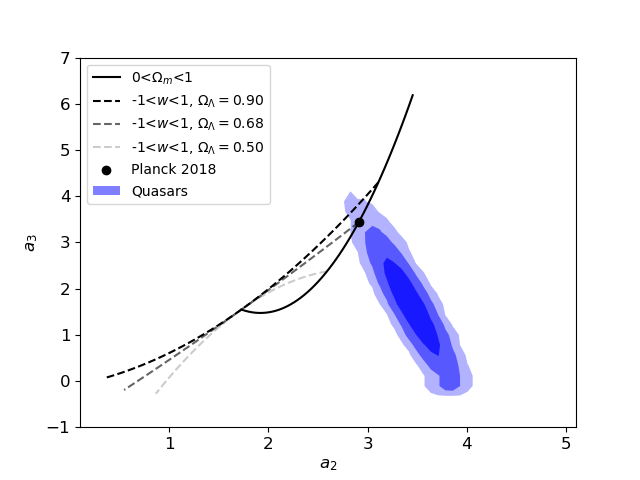

In [248]:
def a2_fn(Omm, w=-1):
    # return -3./4*(Omm - 2.)*np.log(10)
    return (w*3./4*Omm + 3./4.*(1.-w))*np.log(10)
def a3_fn(Omm, w=-1):
    return ((3./8*w**2-w/2.+7./24)+(-3./2*w**2+w/2.)*Omm + 9./8*Omm**2*w**2)*np.log(10)**2


_, ax = plt.subplots()
#Omm_arr = np.linspace(-1., 2.)
#plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), '--', label='-1<$\Omega_m$<2')
Omm_arr = np.linspace(0., 1.)
plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), 'k', label='0<$\Omega_m$<1')

w_arr = np.linspace(-1., 1.)
plt.plot(a2_fn(0.2, w_arr), a3_fn(0.2, w_arr), 'k--', alpha=1., label='-1<$w$<1, $\Omega_\Lambda=0.90$')
plt.plot(a2_fn(0.315, w_arr), a3_fn(0.315, w_arr), 'k--', alpha=0.6, label='-1<$w$<1, $\Omega_\Lambda=0.68$')
plt.plot(a2_fn(0.5, w_arr), a3_fn(0.5, w_arr), 'k--', alpha=0.2, label='-1<$w$<1, $\Omega_\Lambda=0.50$')


plt.plot(a2_fn(0.315), a3_fn(0.315), 'ko', label='Planck 2018')

a2a3_arr = np.loadtxt('../quasars/chains/run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma/plots/corner_pts_1sigma__run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma.txt') 
plt.fill(a2a3_arr[:,0], a2a3_arr[:,1], 'b--', alpha=0.7)

a2a3_arr = np.loadtxt('../quasars/chains/run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma/plots/corner_pts_2sigma__run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma.txt') 
plt.fill(a2a3_arr[:,0], a2a3_arr[:,1], 'b--', alpha=0.5, label="Quasars")

a2a3_arr = np.loadtxt('../quasars/chains/run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma/plots/corner_pts_3sigma__run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma.txt') 
plt.fill(a2a3_arr[:,0], a2a3_arr[:,1], 'b--', alpha=0.3)

plt.legend()
plt.ylim(-1, 7)
plt.xlim(0.1, 5.1)
plt.xlabel('$a_2$')
plt.ylabel('$a_3$')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

#plt.savefig('./plots/a2_a3.pdf')

<IPython.core.display.Javascript object>


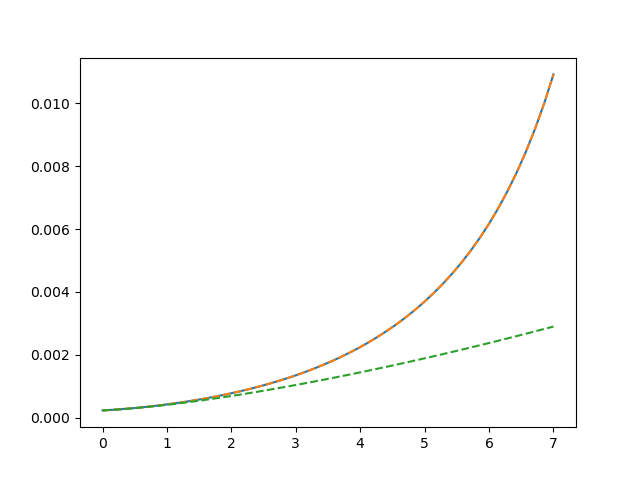

In [204]:
# test the 2 param Hz
z_arr = np.linspace(0, 7)
H_arr_cross_check = co.H_at_z_cross_check(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
H_arr = co.H_at_z(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
H_exact_arr = co.H_at_z_exact(z_arr, h0=0.7, OmL=0.7)
plt.subplots()
plt.plot(z_arr, H_arr)
plt.plot(z_arr, H_arr_cross_check, '--')
plt.plot(z_arr, H_exact_arr, '--')

<IPython.core.display.Javascript object>


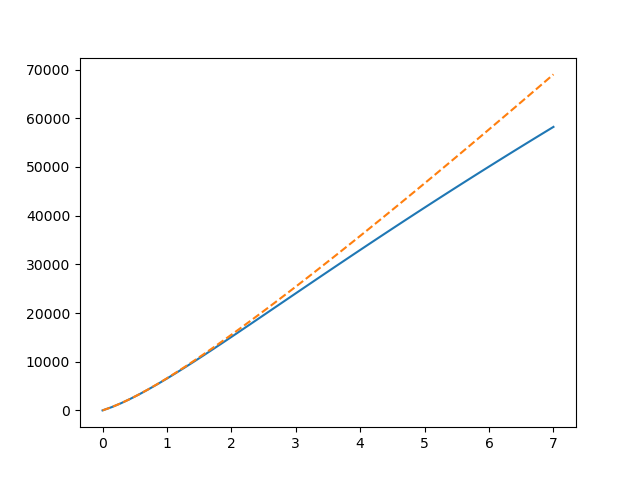

In [191]:
# test the 2 param DL
z_arr = np.linspace(0, 7)
approx_arr = co.dL_at_z(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
exact_arr = np.array([co.tau_at_z_exact(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])
plt.subplots()
plt.plot(z_arr, approx_arr)
plt.plot(z_arr, exact_arr, '--')

In [22]:
print(a2_fn(0.3))
print(a3_fn(0.3))

2.9357959935674085
3.5412261129570313


In [9]:
from igm import igm_Psurv
pgamma = lambda z: igm_Psurv(ma=10**(-12),
                              #ma=10**(-12.5),
                              g=10**(-8.5), 
                              #g=10**(-10.5), 
                              z=z,
                              s=1.,
                              B=1.,
                              omega=1.,
                              mg=4.7e-15, # ne=1.6e-8/cm**3
                              h=0.7,
                              Omega_L=0.7,
                              axion_ini_frac=0.,
                              smoothed=False,
                              redshift_dependent=True,
                              method='simps',
                              prob_func='norm_log',
                              Nz=501)

<IPython.core.display.Javascript object>


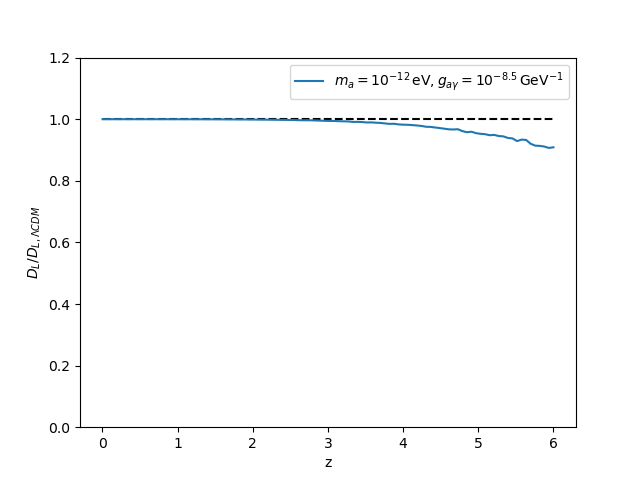

In [10]:
plt.subplots()
z_arr = np.linspace(0.001, 6, 100)
pgamma_arr = np.array([pgamma(z) for z in z_arr])
plt.plot(z_arr, z_arr/z_arr, 'k--')
plt.plot(z_arr, pgamma_arr**0.5, label='$m_a = 10^{-12} \,\mathrm{eV}, g_{a\gamma} = 10^{-8.5} \, \mathrm{GeV}^{-1}$')
plt.ylim(0, 1.2)
plt.xlabel('z')
plt.ylabel('$D_L/D_{L, \Lambda CDM}$')
plt.legend()

In [11]:
# check what point it corresponds to exactly in the a2-a3 plane
# let's do a square fit

#log10ga = -8.3
def ga_to_a2a3(log10ga, ma=10**(-12)):
    z_arr = np.linspace(0.001, 6, 100)
    pgamma = lambda z: igm_Psurv(ma=ma,
                                  #ma=10**(-12.5),
                                  g=10**(log10ga), 
                                  #g=10**(-10.5), 
                                  z=z,
                                  s=1.,
                                  B=1.,
                                  omega=1.,
                                  mg=4.7e-15, # ne=1.6e-8/cm**3
                                  h=0.7,
                                  Omega_L=0.7,
                                  axion_ini_frac=0.,
                                  smoothed=False,
                                  redshift_dependent=True,
                                  method='simps',
                                  prob_func='norm_log',
                                  Nz=501)
    pgamma_arr = np.array([pgamma(z) for z in z_arr])
    DL_LCDM_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])
    DL_axion_arr = DL_LCDM_arr * pgamma_arr**0.5
    square_flat = []

    a2_arr = np.linspace(1, 6)
    a3_arr = np.linspace(0, 7)
    a2_mesh, a3_mesh = np.meshgrid(a2_arr, a3_arr, indexing='ij')
    a2_flat, a3_flat = a2_mesh.reshape(-1), a3_mesh.reshape(-1)
    for i, _ in enumerate(a2_flat):
        a2 = a2_flat[i]
        a3 = a3_flat[i]

        DL_over_DLLCDM = co.dL_at_z_a2a3(z_arr,
                                         h0=0.7, 
                                         a2=a2,
                                         a3=a3)
        square = sum((DL_over_DLLCDM - DL_axion_arr)**2)
        square_flat.append(square)

    square_flat = np.array(square_flat)
    square_mesh = square_flat.reshape(a2_mesh.shape)
    min_idx = np.argmin(square_flat)
    a2_min = a2_flat[min_idx]
    a3_min = a3_flat[min_idx]
    return (a2_min, a3_min)

<IPython.core.display.Javascript object>


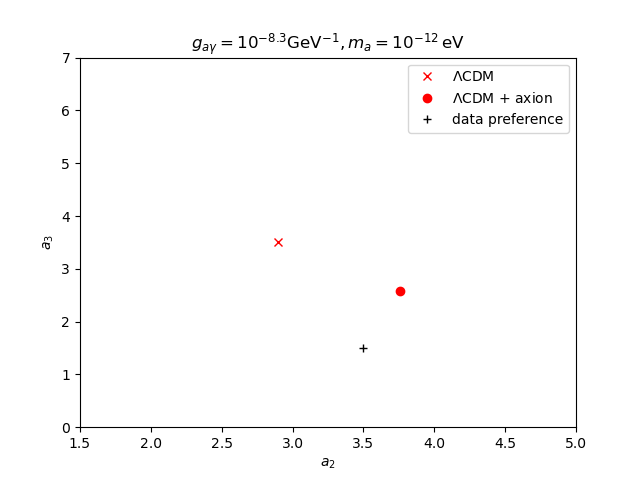

Text(0, 0.5, '$a_3$')

In [12]:
log10ga = -8.3
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga)

plt.subplots()
#plt.contourf(a2_mesh, a3_mesh, np.log(square_mesh))
plt.xlim(1.5,5)
plt.ylim(0, 7)
plt.plot([2.9],[3.5], 'rx', label=r"$\Lambda$CDM")
plt.plot(a2_min, a3_min, 'ro', label="$\Lambda$CDM + axion")
plt.plot([3.5], [1.5], 'k+', label="data preference")
plt.title('$g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{-1}, m_a = 10^{-12} \, \mathrm{eV}$' %log10ga)
plt.legend()
plt.xlabel("$a_2$")
plt.ylabel("$a_3$")

In [226]:
log10ga_arr = np.linspace(-15, -7, 70)
a2a3_arr = np.array([ga_to_a2a3(log10ga=val) for val in log10ga_arr])
a2_arr = a2a3_arr[:,0]
a3_arr = a2a3_arr[:,1]

<IPython.core.display.Javascript object>


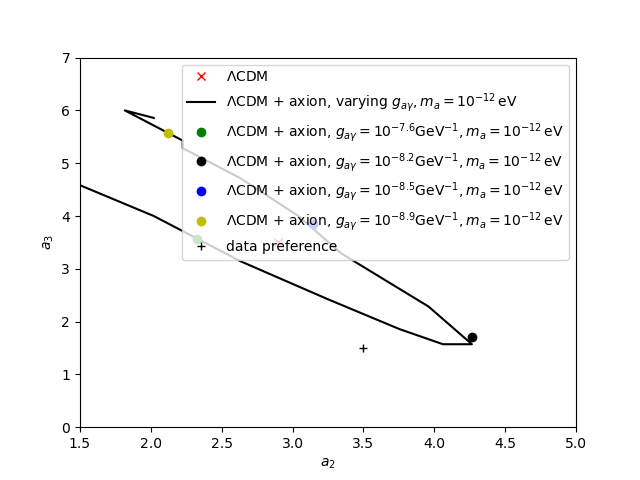

Text(0, 0.5, '$a_3$')

In [227]:

plt.subplots()
#plt.contourf(a2_mesh, a3_mesh, np.log(square_mesh))
plt.xlim(1.5,5)
plt.ylim(0, 7)
plt.plot([2.9],[3.5], 'rx', label=r"$\Lambda$CDM")
plt.plot(a2_arr, a3_arr, 'k', label="$\Lambda$CDM + axion, varying $g_{a\gamma}, m_a = 10^{-12} \, \mathrm{eV}$")

log10ga = -7.6
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga)
plt.plot(a2_min, a3_min, 'go', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{-1}, m_a = 10^{-12} \, \mathrm{eV}$" %log10ga)

log10ga = -8.2
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga)
plt.plot(a2_min, a3_min, 'ko', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{-1}, m_a = 10^{-12} \, \mathrm{eV}$" %log10ga)

log10ga = -8.5
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga)
plt.plot(a2_min, a3_min, 'bo', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{-1}, m_a = 10^{-12} \, \mathrm{eV}$" %log10ga)

log10ga = -8.9
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga)
plt.plot(a2_min, a3_min, 'yo', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{-1}, m_a = 10^{-12} \, \mathrm{eV}$" %log10ga)

plt.plot([3.5], [1.5], 'k+', label="data preference")

plt.legend()
plt.xlabel("$a_2$")
plt.ylabel("$a_3$")

<IPython.core.display.Javascript object>


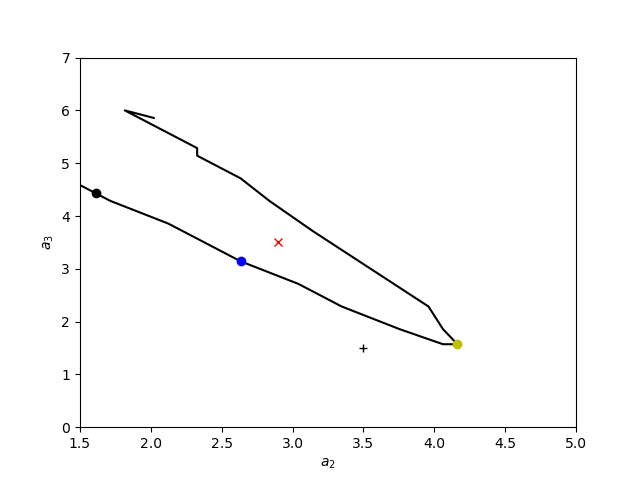

Text(0, 0.5, '$a_3$')

In [20]:
log10ga_arr = np.linspace(-13, -7, 70)

ma = 4.e-13
a2a3_arr = np.array([ga_to_a2a3(log10ga=val,ma=ma) for val in log10ga_arr])
a2_arr = a2a3_arr[:,0]
a3_arr = a2a3_arr[:,1]


plt.subplots()
#plt.contourf(a2_mesh, a3_mesh, np.log(square_mesh))
plt.xlim(1.5,5)
plt.ylim(0, 7)
plt.plot([2.9],[3.5], 'rx', label=r"$\Lambda$CDM")
plt.plot(a2_arr, a3_arr, 'k', label="$\Lambda$CDM + axion, varying $g_{a\gamma}, m_a = 10^{%.1f} \, \mathrm{eV}$")

log10ga = -7.6
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga,ma=ma)
plt.plot(a2_min, a3_min, 'go', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{%.1f}, m_a = 10^{-12} \, \mathrm{eV}$" %(log10ga,np.log10(ma)))

log10ga = -8.2
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga,ma=ma)
plt.plot(a2_min, a3_min, 'ko', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{%.1f}, m_a = 10^{-12} \, \mathrm{eV}$" %(log10ga,np.log10(ma)))

log10ga = -8.5
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga,ma=ma)
plt.plot(a2_min, a3_min, 'bo', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{%.1f}, m_a = 10^{-12} \, \mathrm{eV}$" %(log10ga,np.log10(ma)))

log10ga = -8.9
a2_min, a3_min = ga_to_a2a3(log10ga=log10ga,ma=ma)
plt.plot(a2_min, a3_min, 'yo', label="$\Lambda$CDM + axion, $g_{a\gamma} = 10^{%.1f} \mathrm{GeV}^{%.1f}, m_a = 10^{-12} \, \mathrm{eV}$" %(log10ga,np.log10(ma)))

plt.plot([3.5], [1.5], 'k+', label="data preference")

plt.legend()
plt.xlabel("$a_2$")
plt.ylabel("$a_3$")

<IPython.core.display.Javascript object>


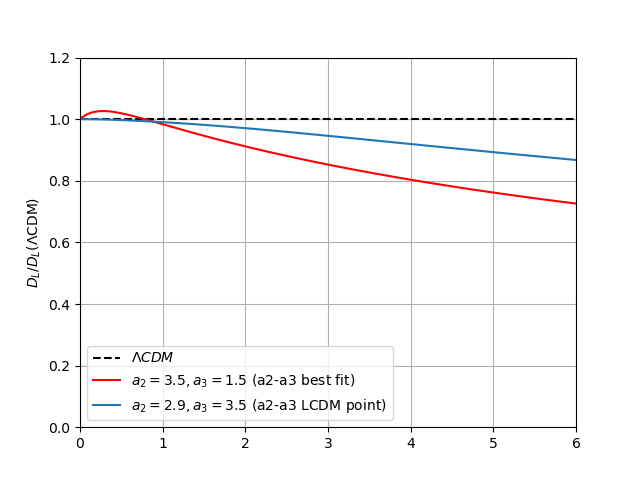

<IPython.core.display.Javascript object>


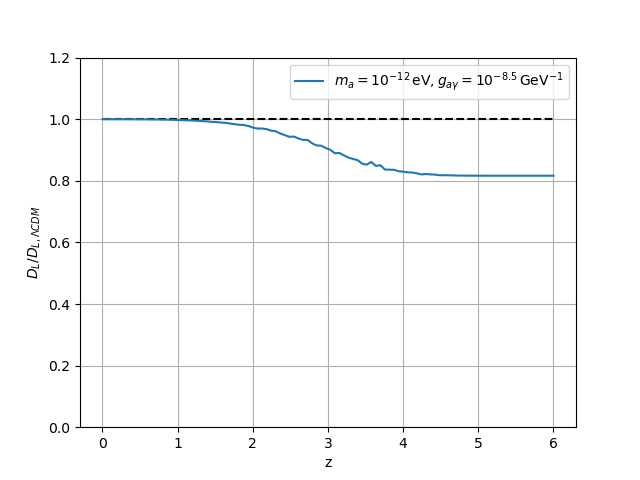

In [274]:
# test the 2 param DL
z_arr = np.linspace(0.001, 7,300)
approx_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
exact_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])

# manually shift to small a3 large a2 direction
sa3_la2_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=3.5, a3=1.5)

# add some photon-to-axion conversion




# moment of truth

# plt.subplots()
# plt.plot(z_arr, [1]*len(exact_arr), 'k--', label="exact, $\Omega_m=0.3, \Lambda$CDM")
# plt.plot(z_arr, approx_arr/exact_arr, label="approx, $a_2=2.9, a_3=3.5$")
# plt.xlim(0, 6)
# plt.ylim(0, 1.2)
# #plt.xlim(0, 1.5)
# plt.legend()
# plt.grid()
# plt.ylabel('$D_L^{approx}/D_L^{exact}$')

plt.subplots()
#plt.plot(z_arr, approx_arr/approx_arr, 'k--', label=r'$a_2=2.9, a_3=3.5$')
plt.plot(z_arr, exact_arr/exact_arr, 'k--', label=r'$\Lambda CDM$')
plt.plot(z_arr, sa3_la2_arr/exact_arr, 'r-', label=r'$a_2=3.5, a_3=1.5$ (a2-a3 best fit)')
plt.plot(z_arr, approx_arr/exact_arr, label="$a_2=2.9, a_3=3.5$ (a2-a3 LCDM point)")
plt.grid()
plt.ylim(0., 1.2)
plt.xlim(0, 6)
#plt.xlim(0, 1.5)
plt.legend()
#plt.grid()
plt.ylabel(r"$D_L/D_L(\rm \Lambda CDM)$")







from igm import igm_Psurv
pgamma = lambda z: igm_Psurv(ma=10**(-12),
                              #ma=10**(-12.5),
                              g=10**(-7.8), 
                              #g=10**(-10.5), 
                              z=z,
                              s=1.,
                              B=1.,
                              omega=1.,
                              mg=4.7e-15, # ne=1.6e-8/cm**3
                              h=0.7,
                              Omega_L=0.7,
                              axion_ini_frac=0.,
                              smoothed=False,
                              redshift_dependent=True,
                              method='simps',
                              prob_func='norm_log',
                              Nz=501)


plt.subplots()
z_arr = np.linspace(0.001, 6, 100)
pgamma_arr = np.array([pgamma(z) for z in z_arr])
plt.plot(z_arr, z_arr/z_arr, 'k--')
plt.plot(z_arr, pgamma_arr**0.5, label='$m_a = 10^{-12} \,\mathrm{eV}, g_{a\gamma} = 10^{-8.5} \, \mathrm{GeV}^{-1}$')
plt.ylim(0, 1.2)
plt.xlabel('z')
plt.ylabel('$D_L/D_{L, \Lambda CDM}$')
plt.legend()
plt.grid()

In [255]:
# # test the 2 param DL
# z_arr = np.linspace(0.001, 7,300)
# approx_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
# exact_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])

# # manually shift to small a3 large a2 direction
# sa3_la2_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=3.5, a3=1.5)

# # add some photon-to-axion conversion




# # moment of truth

# plt.subplots()
# plt.plot(z_arr, [1]*len(exact_arr), 'k--', label="exact, $\Omega_m=0.3, \Lambda$CDM")
# plt.plot(z_arr, approx_arr/exact_arr, label="approx, $a_2=2.9, a_3=3.5$")
# plt.xlim(0, 6)
# plt.ylim(0, 1.2)
# #plt.xlim(0, 1.5)
# plt.legend()
# plt.grid()
# plt.ylabel('$D_L^{approx}/D_L^{exact}$')

# plt.subplots()
# #plt.plot(z_arr, approx_arr/approx_arr, 'k--', label=r'$a_2=2.9, a_3=3.5$')
# plt.plot(z_arr, approx_arr/approx_arr, 'k--', label=r'$\Lambda CDM$')
# plt.plot(z_arr, sa3_la2_arr/approx_arr, 'r-', label=r'$a_2=3.5, a_3=1.5$')
# plt.ylim(0., 1.2)
# plt.xlim(0, 6)
# #plt.xlim(0, 1.5)
# plt.legend()
# #plt.grid()
# plt.ylabel(r"$D_L/D_L(\rm benchmark)$")

<IPython.core.display.Javascript object>


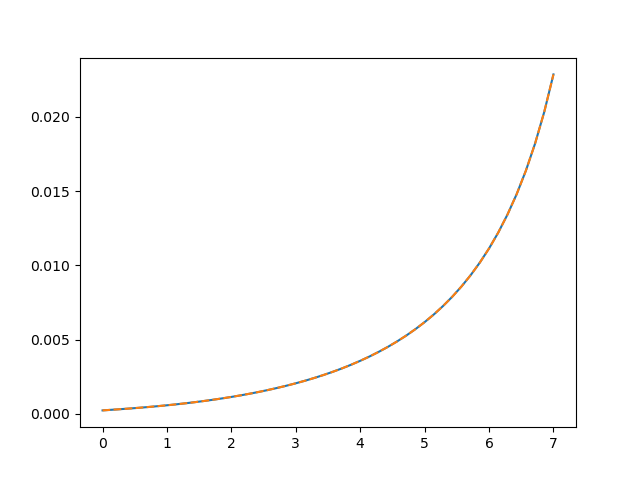

In [162]:
# test the 2 param DL log10 vs ln expansion
z_arr = np.linspace(0, 7)
H_arr = co.H_at_z(z_arr, h0=0.7, a2=2.0, a3=2.5)
H_naturallog_arr = co.H_at_z_naturallog(z_arr, h0=0.7, a2=2.0/np.log(10), a3=2.5/np.log(10)**2)
plt.subplots()
plt.plot(z_arr, H_arr)
plt.plot(z_arr, H_arr_naturallog, '--')


# check on the wCDM fit

In [333]:
# (bf_chi2, 
#  x_mesh,
#  y_mesh,
#  chi2_mesh,
#  idx_mins_global,
#  x_arr,
#  y_arr,
#  delta_arr, 
#  _,
#  pts, 
#  blobs) = parse(directory="./chains/run028_td_pan_sh0es_boss_cluster_noicm/",
#                     chain_name="chain_1.h5",
#                     bins=25,
#               x_name='logma',
#               y_name='logga')


In [334]:
# plt.subplots()
# plt.pcolormesh(ma_mesh, ga_mesh, np.log(np.abs(chi2_mesh)))

In [508]:
(bf_chi2, 
 x_mesh,
 y_mesh,
 chi2_mesh,
 idx_mins_global,
 x_arr,
 y_arr,
 delta_arr, 
 _,
 pts, 
 blobs) = parse(directory="../quasars_wCDM/chains/run034_5_wCDM_quasar_H0Planck_prior/",
                    chain_name="chain_1.h5",
                    bins=25,
              x_name='OmL',
              y_name='w',
              y_lower=0.42)


<KeysViewHDF5 ['accepted', 'blobs', 'chain', 'log_prob']>
pts shape is: (40000, 100, 6)
chi2_tot shape is: (40000, 100)
experiments: dict_keys(['quasars', 'tdcosmo'])
variables scanned: ['OmL', 'h0', 'w', 'qso_gamma', 'qso_beta', 'qso_delta']
0
2
edges_y: [0.42000283 0.44231041 0.464618   0.48692558 0.50923316 0.53154075
 0.55384833 0.57615591 0.5984635  0.62077108 0.64307866 0.66538625
 0.68769383 0.71000141 0.732309   0.75461658 0.77692416 0.79923174
 0.82153933 0.84384691 0.86615449 0.88846208 0.91076966 0.93307724
 0.95538483 0.97769241 0.99999999]
chain_y has the length of 4000000
chain_y_cut has the length of 3765525
edges_x: [0.         0.02999997 0.05999995 0.08999992 0.1199999  0.14999987
 0.17999985 0.20999982 0.23999979 0.26999977 0.29999974 0.32999972
 0.35999969 0.38999967 0.41999964 0.44999962 0.47999959 0.50999956
 0.53999954 0.56999951 0.59999949 0.62999946 0.65999944 0.68999941
 0.71999938 0.74999936]
chain_x has the length of 4000000
chain_x_cut has the length of 4000

100%|██████████| 25/25 [00:46<00:00,  1.84s/it]


In [509]:
query(x=0.65, 
        y=-0.75, 
        x_mesh=x_mesh, 
        y_mesh=y_mesh, 
        target_mesh=chi2_mesh)

22
0


-149.38203213587258

In [512]:
query(x=0.4, 
        y=0.97, 
        x_mesh=x_mesh, 
        y_mesh=y_mesh, 
        target_mesh=chi2_mesh)

13
25


-169.65542631704182

In [513]:
idx = query(x=0.4,  #0.65, #0.5, 
        y=0.97, #-0.75,     #0.9, 
        x_mesh=x_mesh, 
        y_mesh=y_mesh, 
        target_mesh=idx_mins_global)

print(idx)

13
25
1646185


In [514]:
print(pts[idx])
print(blobs['tdcosmo'].reshape(-1)[idx])
print(blobs['quasars'].reshape(-1)[idx])
# OmL, h0, w, qso_gamma, qso_beta, qso_delta,

[0.39100339 0.67358947 0.99981344 0.58721615 8.47718172 0.22532541]
-8.60483178078829
-161.05059453625353


<IPython.core.display.Javascript object>


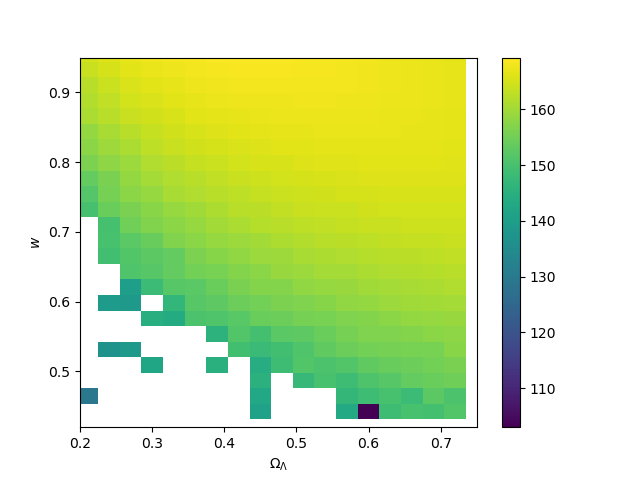

<ipython-input-516-14436b95cf6c>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(x_mesh, y_mesh, (-(chi2_mesh)))


Text(0, 0.5, '$w$')

In [516]:
plt.subplots()
pcm = plt.pcolormesh(x_mesh, y_mesh, (-(chi2_mesh))) 
# im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
plt.colorbar(pcm)
plt.ylim(0.42, 0.95)
plt.xlim(0.2, 0.75)
plt.xlabel('$\Omega_\Lambda$')
plt.ylabel('$w$')

In [402]:
print(a2_fn(0.6, 1.))
print(a3_fn(0.6, 0.8))

1.0361632918473205
0.2908974763282482


In [353]:
co.LumMod(ma=1e-15, 
       g=1e-17,
       z=3.5,
       B=1.,
       mg=1e-15,
       h=0.7,
       OmL=0.65,
       w=0.7,
       s=1.,
       omega=1.
      )

-1.3521076490418696e-12

<IPython.core.display.Javascript object>


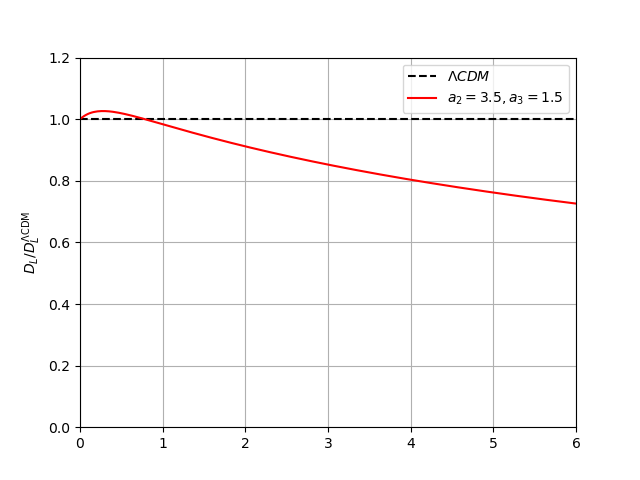

<IPython.core.display.Javascript object>


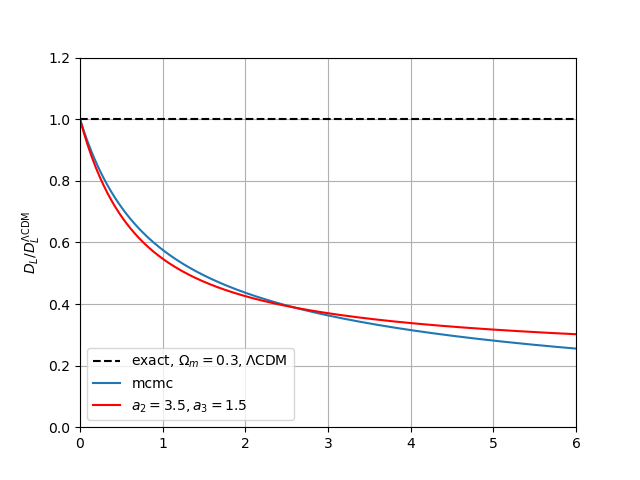

Text(0, 0.5, '$D_L/D_L^{\\rm \\Lambda CDM}$')

In [349]:
# test the 2 param DL
z_arr = np.linspace(0.001, 7,300)

# bestfit
mcmc_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=a2_fn(0.5, w=0.9), a3=a3_fn(0.5, w=0.9))

# LCDM
exact_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])

# wCDM
exact_wcdm_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7, w=0.9)*(1+z) for z in z_arr])
exact_wcdm_arr = np.array([co.tau_at_z(z, h0=0.7, OmL=0.7, w=0.9)*(1+z) for z in z_arr])

# manually shift to small a3 large a2 direction
bestfit_a2a3_arr = co.dL_at_z_a2a3(z_arr, h0=0.7, a2=3.5, a3=1.5)

# add some photon-to-axion conversion




# moment of truth



plt.subplots()
#plt.plot(z_arr, mcmc_arr/mcmc_arr, 'k--', label=r'$a_2=2.9, a_3=3.5$')
plt.plot(z_arr, exact_arr/exact_arr, 'k--', label=r'$\Lambda CDM$')
#plt.plot(z_arr, bestfit_a2a3_arr/mcmc_arr, 'r--', label=r'$a_2=3.5, a_3=1.5$/mcmc')
plt.plot(z_arr, bestfit_a2a3_arr/exact_arr, 'r-', label=r'$a_2=3.5, a_3=1.5$')
plt.ylim(0., 1.2)
plt.xlim(0, 6)
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()
plt.ylabel(r"$D_L/D_L^{\rm \Lambda CDM}$")


plt.subplots()
plt.plot(z_arr, [1]*len(exact_arr), 'k--', label="exact, $\Omega_m=0.3, \Lambda$CDM")
plt.plot(z_arr, mcmc_arr/exact_arr, label="mcmc")
plt.plot(z_arr, exact_wcdm_arr/exact_arr, 'r-', label=r'$a_2=3.5, a_3=1.5$')
plt.xlim(0, 6)
plt.ylim(0, 1.2)
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()
plt.ylabel(r'$D_L/D_L^{\rm \Lambda CDM}$')

#### Plot out wCDM best fit

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


<ipython-input-503-c77410c97fa3>:20: RuntimeWarning: Mean of empty slice.
  z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
/a/home/cc/students/physics/chensun/app/anaconda2/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-503-c77410c97fa3>:21: RuntimeWarning: invalid value encountered in double_scalars
  sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))/len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))])
/a/home/cc/students/physics/chensun/app/anaconda2/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


a2_val 1.0619649180331743
a3_val -0.01284686189842511
44.645068210627336


<ipython-input-415-a1e7266b68ad>:12: RuntimeWarning: divide by zero encountered in log10
  res = np.log10(DL_in_10pc) * 5.
<ipython-input-415-a1e7266b68ad>:5: RuntimeWarning: divide by zero encountered in log10
  res = np.log10(DL_in_10pc) * 5.


<IPython.core.display.Javascript object>


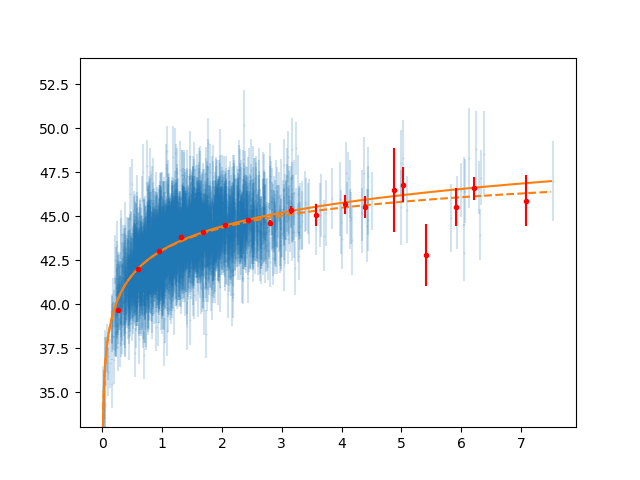

(33.0, 54.0)

In [503]:
# distance modulus

gamma = 0.58994576
beta = 8.40022856
delta = 0.22514974

# exp
(_ ,qso_z_arr ,_ ,_ ,_ ,_ ,_ , _) = data
mu_exp_arr, sigma_arr = dist_modulus_exp(gamma=gamma, beta=beta, delta=delta, data=data)

# exp directly read the distance modulus from Lusso data set
mu_expread_arr, sigma_expread_arr = dist_modulus_expread(gamma, beta, delta)

# bin data points
# bins = np.linspace(0, 7, 12)
_, bins = np.histogram(qso_z_arr, bins=20)
# z_edges = sorted(qso_z_arr)[::len(qso_z_arr)//1]]
# _, bins = np.histogram(qso_z_arr, bins=z_edges)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))/len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])

# theory wCDM
OmL = 0.4143729
#OmL = 0.65
h0 = 0.67345071
w = 0.92925799
# w=-1.
z_arr = np.linspace(0, 7.5, 3000)
mu_th_arr = dist_modulus_th(z_arr, h0=h0, OmL=OmL, w=w)

# theory wCDM mapped to a2 a3
a2_val = a2_fn(Omm=1-OmL, w=w)
a3_val = a3_fn(Omm=1-OmL, w=w)
print("a2_val", a2_val)
print("a3_val", a3_val)
mu_th_a2a3_arr = dist_modulus_th_a2a3(z_arr, h0, a2_val, a3_val)




# chi2 using binned data
# sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=OmL, w=w) - mu_exp_bin_arr)**2/sigma_bin_arr**2)
# compute the reduced chi2
chi2_tmp = (np.interp(z_bin_arr, z_arr, mu_th_a2a3_arr) - mu_exp_bin_arr)**2/(0.001**2+sigma_bin_arr**2)
chi2_tmp = np.nan_to_num(chi2_tmp, nan=0)
print(np.sum(chi2_tmp))


plt.subplots()

# full data
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', alpha=0.2, markersize=0.7)

# # plot dist mod directly from data
# plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

# binned
plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='red',zorder=10)

# theory
plt.plot(z_arr, mu_th_arr, zorder=3, color='C1')
plt.plot(z_arr, mu_th_a2a3_arr, zorder=4, color='C1',linestyle='--')
#plt.xlim(-0.1, 6)
plt.ylim(33, 54)



#### Plot out a2 a3 best fit

In [403]:
# plot out a2 a3 best fit point
(bf_chi2, 
 x_mesh,
 y_mesh,
 chi2_mesh,
 idx_mins_global,
 x_arr,
 y_arr,
 delta_arr, 
 _,
 pts, 
 blobs) = parse(directory="../quasars/chains/run024_qso_PAN_intrinsic_scattering_a2a3_add_sigma_nuissance_add_logsigma/",
			  chain_name="chain_1.h5",
			  bins=25,
			  x_name='a2',
			  y_name='a3')

<KeysViewHDF5 ['accepted', 'blobs', 'chain', 'log_prob']>
pts shape is: (40000, 100, 7)
chi2_tot shape is: (40000, 100)
experiments: dict_keys(['quasars', 'pantheon'])
variables scanned: ['a2', 'a3', 'h0', 'M0', 'qso_gamma', 'qso_beta', 'qso_delta']
0
1
edges_y: [0.         0.19381549 0.38763099 0.58144648 0.77526197 0.96907747
 1.16289296 1.35670845 1.55052395 1.74433944 1.93815493 2.13197043
 2.32578592 2.51960141 2.71341691 2.9072324  3.10104789 3.29486339
 3.48867888 3.68249437 3.87630987 4.07012536 4.26394085 4.45775635
 4.65157184 4.84538733 5.03920283]
chain_y has the length of 4000000
chain_y_cut has the length of 4000000
edges_x: [0.         0.1651589  0.33031781 0.49547671 0.66063561 0.82579451
 0.99095342 1.15611232 1.32127122 1.48643013 1.65158903 1.81674793
 1.98190683 2.14706574 2.31222464 2.47738354 2.64254245 2.80770135
 2.97286025 3.13801915 3.30317806 3.46833696 3.63349586 3.79865477
 3.96381367 4.12897257]
chain_x has the length of 4000000
chain_x_cut has the length 

100%|██████████| 25/25 [01:21<00:00,  3.26s/it]


In [533]:
np.where(np.array(['a','bcd','efs'])=='bcd', [1,2,3], None)

array([None, 2, None], dtype=object)

In [543]:
np.where((np.array(['a','bcd','efs'])=='bcd') | (np.array(['a','bcd','efs'])=='efs'))

(array([1, 2]),)

In [540]:
np.array([1,2,3])[(np.array(['a','bcd','efs'])=='bcd')]

array([2])

In [546]:
np.array([1,2,3,4])[(np.array(['a','bcd','efs', 'cdd'])=='efs')| (np.array(['a','bcd','efs','cdd'])=='bcd') ]

array([2, 3])

In [539]:
np.array([1,2,3])[([1],)]

array([2])

In [522]:
['a','bcd','efs'].index('asdfasd')

ValueError: 'asdfasd' is not in list

In [520]:
np.array(['a','bcd','efs']).index('bcd')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [504]:
print(query(x=3.5, 
        y=1.2, 
        x_mesh=x_mesh, 
        y_mesh=y_mesh, 
        target_mesh=chi2_mesh))

21
6
-409.4724481022513


In [505]:
idx = query(x=3.5, 
        y=1.2,
        x_mesh=x_mesh, 
        y_mesh=y_mesh, 
        target_mesh=idx_mins_global)

print(idx)

21
6
44063


In [506]:
print(pts[idx])
#print(blobs['tdcosmo'].reshape(-1)[idx])
print(blobs['pantheon'].reshape(-1)[idx])
print(blobs['quasars'].reshape(-1)[idx])
# a2, a3, h0, M0, qso_gamma, qso_beta, qso_delta, 

[  3.51477516   1.32283352   0.75914343 -19.20562496   0.64179514
   6.97323023   0.32795569]
-1447.031907402738
1037.5594593004867


array([41.06170385, 43.09840558, 44.27348947, 45.09228595, 45.67942872,
       46.11928793, 46.50185486, 46.80209005, 47.11334325, 47.28342592,
       47.53079205, 47.68681559, 47.88719921, 47.98224683,         nan,
       48.1952715 ])

In [478]:
sigma_bin_arr

array([0.1550616 , 0.08597795, 0.09136506, 0.11324271, 0.15244516,
       0.25472319, 0.60300151, 0.78148309, 0.97062037, 1.31176101,
       1.90884241, 0.85170014,        nan, 2.36871207])

In [482]:
[len((sigma_arr**2)[digi==i]) for i in range(1, len(bins))]

[163, 588, 597, 470, 320, 157, 75, 12, 11, 8, 5, 1, 7, 5, 0, 1]

In [481]:
[max(1, len((sigma_arr**2)[digi==i])) for i in range(1, len(bins))]

[163, 588, 597, 470, 320, 157, 75, 12, 11, 8, 5, 1, 7, 5, 1, 1]

In [483]:
sigma_bin_arr

array([0.18006619, 0.09494904, 0.0945448 , 0.10779007, 0.1333962 ,
       0.19627208, 0.28611922, 0.74893969, 0.78148309, 0.97062037,
       1.31176101, 2.62463557, 1.08294904, 1.23275987, 0.        ,
       2.36871207])

In [488]:
(0.001**2+sigma_bin_arr**2)

array([3.24248322e-02, 9.01631928e-03, 8.93971950e-03, 1.16196988e-02,
       1.77955459e-02, 3.85237300e-02, 8.18652097e-02, 5.60911659e-01,
       6.10716817e-01, 9.42104900e-01, 1.72071794e+00, 6.88871289e+00,
       1.17277962e+00, 1.51969789e+00, 1.00000000e-06, 5.61079785e+00])

In [492]:
mu_exp_bin_arr

array([41.02457276, 43.20391214, 44.37905555, 45.03243689, 45.49998236,
       45.80870204, 46.12676421, 46.18068893, 46.69562645, 46.92709395,
       47.87222201, 43.41908081, 46.74167319, 48.30794632,         nan,
       47.19573149])

In [491]:
np.interp(z_bin_arr, z_arr, mu_th_a2a3_arr) - mu_exp_bin_arr

array([ 0.0371311 , -0.10550656, -0.10556608,  0.05984906,  0.17944636,
        0.31058589,  0.37509065,  0.62140112,  0.4177168 ,  0.35633197,
       -0.34142996,  4.26773478,  1.14552602, -0.32569949,         nan,
        0.99954001])

In [489]:
(np.interp(z_bin_arr, z_arr, mu_th_a2a3_arr) - mu_exp_bin_arr)**2/(0.001**2+sigma_bin_arr**2)

array([0.04252045, 1.23460949, 1.24659367, 0.30826187, 1.80949759,
       2.50400453, 1.71859323, 0.68841385, 0.28570906, 0.1347753 ,
       0.06774754, 2.64397145, 1.11890575, 0.06980345,        nan,
       0.17806384])

In [496]:
chi2_tmp[chi2_tmp==np.nan]=0.

In [497]:
chi2_tmp

array([0.24232466, 2.51982928, 0.27486703, 0.48381185, 3.2066913 ,
       1.89681244, 3.93885143, 0.01806428, 0.64105623, 0.4565369 ,
       0.01156546, 0.10515903, 2.64397145, 1.11890575, 0.06980345,
       0.17806384,        nan])

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---
19.34809468561191


<ipython-input-501-ceebdbe67f36>:26: RuntimeWarning: Mean of empty slice.
  z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
/a/home/cc/students/physics/chensun/app/anaconda2/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/a/home/cc/students/physics/chensun/app/anaconda2/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
<ipython-input-415-a1e7266b68ad>:5: RuntimeWarning: divide by zero encountered in log10
  res = np.log10(DL_in_10pc) * 5.


<IPython.core.display.Javascript object>


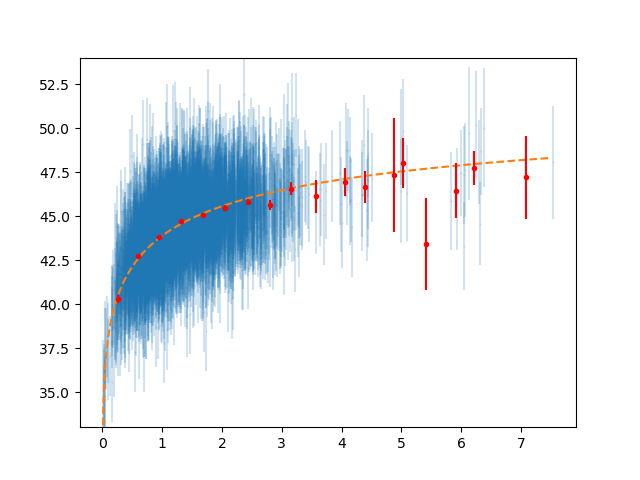

(33.0, 54.0)

In [501]:
# distance modulus

h0 = 0.759
a2_val = 3.514
a3_val = 1.3228
gamma = 0.64179514
beta = 6.97323023
delta = 0.32795569




# exp
(_ ,qso_z_arr ,_ ,_ ,_ ,_ ,_ , _) = data
mu_exp_arr, sigma_arr = dist_modulus_exp(gamma=gamma, beta=beta, delta=delta, data=data)

# exp directly read the distance modulus from Lusso data set
mu_expread_arr, sigma_expread_arr = dist_modulus_expread(gamma, beta, delta)

# bin data points
# bins = np.linspace(0, 7, 12)
_, bins = np.histogram(qso_z_arr, bins=20)
# z_edges = sorted(qso_z_arr)[::len(qso_z_arr)//16]
# _, bins = np.histogram(qso_z_arr, bins=z_edges)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
#sigma_bin_arr = np.array([np.sqrt(np.mean((sigma_arr**2)[digi==i])) for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.sum((sigma_arr**2)[digi==i]))/max(1,len((sigma_arr**2)[digi==i])) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])



# theory a2 a3
mu_th_a2a3_arr = dist_modulus_th_a2a3(z_arr, h0, a2_val, a3_val)

# compute the reduced chi2
chi2_tmp = (np.interp(z_bin_arr, z_arr, mu_th_a2a3_arr) - mu_exp_bin_arr)**2/(0.001**2+sigma_bin_arr**2)
chi2_tmp = np.nan_to_num(chi2_tmp, nan=0)
print(np.sum(chi2_tmp))

# chi2 using binned data
# sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=OmL, w=w) - mu_exp_bin_arr)**2/sigma_bin_arr**2)

plt.subplots()

# full data
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', alpha=0.2, markersize=0.7)

# # plot dist mod directly from data
# plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

# binned
plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='red',zorder=10)

# theory
# plt.plot(z_arr, mu_th_arr, zorder=3, color='C1')
plt.plot(z_arr, mu_th_a2a3_arr, zorder=4, color='C1',linestyle='--')
#plt.xlim(-0.1, 6)
plt.ylim(33, 54)



In [ ]:
# Q: how to see that a2-a3 best fit is much better? 
# A: note that the reduced chi2 has a 300/2500 pts improvement, means 0.3 sigma improvement on avg
# or 3 sigmas improvement with 25 data points.

In [456]:
#TODO: residual plots
#TODO: gag best fit plot